<center><h1><u></u>$\color{#454775}{\bf \underline {Analyzing\;Marketing\;Campaigns}}$</u></h1></center><br>


In [281]:
# Importing Liberaries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

In [282]:
# loading the marketing dataset: 
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


<br>

## $\color{#454775}{\bf Data\;Assessing}$
### $\color{#454775}{\sf 1-\;Data\;Types\;and\;Null\;Values:}$

In [283]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


<br>

### $\color{#454775}{\sf 2-\;Dataset\;Description:}$

In [284]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')

print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')

print(f'''
- The Data Selection: 
    Start: {marketing.date_served.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_served.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print(f'''
- The Subscription Dates: 
    Start: {marketing.date_subscribed.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_subscribed.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print(f'''
- The Subscription Cancellation occured within: 
    Start: {marketing.date_canceled.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_canceled.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')

print('- The Marketing Channels are as follows:')
for x, y in enumerate(marketing.marketing_channel.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Variant categories are as follows:')
for x, y in enumerate(marketing.variant.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Converted column is classified into:')
for x, y in enumerate(marketing.converted.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Displayed Languages are as follows:')
for x, y in enumerate(marketing.language_displayed.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Preferred Languages are as follows:')
for x, y in enumerate(marketing.language_preferred.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Age Groups are classified as follows:')
for x, y in enumerate(marketing.age_group.unique()): 
    print('  ',x+1, '-', y)

print('\n- The Subscribing Channels are as follows:')
for x, y in enumerate(marketing.subscribing_channel.unique()): 
    print('  ',x+1, '-', y)

print('\n- The is_retained column is classified into:')
for x, y in enumerate(marketing.is_retained.unique()): 
    print('  ',x+1, '-', y)

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.


- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ y

<br>

### $\color{#454775}{\sf 3-\;Summary\;Statistics:}$

In [285]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


<br>

### $\color{#454775}{\sf 4-\;Duplicated\;Values:}$

In [286]:
# Identifying Duplicated Values:
if marketing.duplicated().sum() == 0: 
    print('The Dataset has no Duplicated Values')
else: 
    print(f'''
- The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}"''')


- The Dataset has 37 Duplicated rows and their indexes are as follows:
 
"470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506"


<br>

### $\color{#454775}{\sf 5-\;Missing\;Values:}$

In [287]:
# Identifying the Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


In [288]:
# Detemining the indexes of the null values for columns:
# 1- date_served
print(f'''
- The date_served column has {marketing.date_served.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}"\n''') 

# 2- marketing_channel
print(f'''
- The marketing_channel column has {marketing.marketing_channel.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.marketing_channel.isna()==True].index.to_list()))}"\n''') 

# 3- converted
print(f'''
- The converted column has {marketing.converted.isna().sum()} null values and their indexes are as follows:\n 
"{", ".join(map(str,marketing[marketing.converted.isna()==True].index.to_list()))}"\n''')


- The date_served column has 16 null values and their indexes are as follows:
 
"7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The marketing_channel column has 15 null values and their indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"


- The converted column has 15 null values and their indexes are as follows:
 
"9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958"



>$\color{#454775}{Note}:$<br>
> _The three columns share the same missing rows (except for date_served index 7038 )_

<br>

## $\color{#454775}{\bf Data\;Cleaning}$
### $\color{#454775}{\sf 1-\;Removing\;Duplicates:}$


In [289]:
marketing.drop_duplicates(inplace=True)
if marketing.duplicated().sum() == 0: 
    print(f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')

The Dataset has no Duplicated Values with 10000 Row


In [290]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10000,9984,9985,10000,9985,10000,10000,10000,1845,575,1845,1845
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,12,786,4704,5069,8911,9757,9243,1676,162,14,594,1270


<br>

### $\color{#454775}{\sf2-\;Changing\;Dates\;Data\;Types:}$
- ***date_served:*** _str_ to _date_
- ***date_subscribed:*** _str_ to _date_
- ***date_canceled:*** _str_ to _date_


In [291]:
# Changing the data type of date_served: 
marketing['date_served']=pd.to_datetime(marketing['date_served'])

# Changing the data type of date_subscribed: 
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])

# Changing the data type of date_canceled: 
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])

marketing.loc[:,['date_served','date_subscribed','date_canceled']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_served      9984 non-null   datetime64[ns]
 1   date_subscribed  1845 non-null   datetime64[ns]
 2   date_canceled    575 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 312.5 KB


<br> 

### $\color{#454775}{\sf 3-\;Handling\;Nulls:}$
##### ***$\color{#454775}{a)}$ Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** 
Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.<br>
##### ***$\color{#454775}{b)}$ date_served (index 7038):*** 
Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.<br>
##### ***$\color{#454775}{c)}$ date_subscribed:***
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **date_served**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{d)}$ date_canceled:*** 
There is no need to handle its missing values in as these values are naturally missing depending on whether the user canceled his subscription or not. Filling them would introduce bias.<br>
##### ***$\color{#454775}{e)}$ subscribing_channel*** 
1. ***As a Precautionary measure,*** if the user converted,the missing values (if any) would be replaced with **marketing_channel**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>
##### ***$\color{#454775}{f)}$ is_retained:*** 
1. ***As a Precautionary measure,*** if the user converted and there is no mention for canceling the subscription ,the missing values (if any) would be replaced with **True**.  
2. If the user didn't convert, There is no need to handle the missing values as these values are naturally missing depending on whether the user subscribed or not.<br>

In [292]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
marketing.dropna(subset='marketing_channel', inplace=True)

In [293]:
# Nulls at date_served column 
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [294]:
# date_served (index 7038):
# Sorting the table by date served
marketing=marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method='ffill', inplace=True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'\nThe Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column\n')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')


The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column



In [362]:
marketing.head(1)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,matched_lang,dow,ad_repeated,ch_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,True,Mo,False,1


In [363]:
# date_subscribed:
marketing['date_subscribed']= np.where(np.logical_and(marketing.converted==True,marketing.date_subscribed.isna()==True),
                                       marketing.date_served,marketing.date_subscribed)

In [365]:
# subscribing_channel:
marketing['subscribing_channel']= np.where(np.logical_and(marketing.converted==True,marketing.subscribing_channel.isna()==True),
                                       marketing.marketing_channel,marketing.subscribing_channel)

In [367]:
#is_retained:
marketing['is_retained']= np.where(np.logical_and(marketing.converted==True,marketing.is_retained.isna()==True,marketing.date_canceled.isna()==True),
                                       True,marketing.is_retained)

In [368]:
# Checking for Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 33752 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8114
date_canceled,9410


<br>

### $\color{#454775}{\sf 4-\;Changing\;converted\;Data\;Type:}$
- ***converted:*** _str_ to _boolean_

In [369]:
# Changing the data type of converted: 
marketing['converted']=marketing['converted'].astype('bool')
marketing['converted'].dtype

dtype('bool')

<br>

### $\color{#454775}{\sf 5-\;Adding\;New\;Columns:}$
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days
- ***ad_repeated:*** to check whether the user saw the ad multiple times

In [370]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
6355,House Ads,True
1383,Push,False
5849,Email,False
8026,House Ads,True
5261,House Ads,True


In [371]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
1647,English,English,True
6748,German,German,True
6107,English,English,True
7996,English,English,True
6565,English,English,True


In [372]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
8673,2018-01-20,Sa
8394,2018-01-13,Sa
6520,2018-01-07,Su
6662,2018-01-31,We
8588,2018-01-10,We


In [373]:
# Adding ad_repeated column: 
is_repeated_user = marketing.user_id.value_counts()>1

repeated=is_repeated_user.reset_index().rename(columns={'index':'user_id','user_id':'repeated'})\
                         .query('repeated==True').user_id.to_list()


marketing['ad_repeated']=[True if x in repeated else False for x in marketing.user_id]

marketing.loc[:,['user_id','ad_repeated']].head()

,user_id,ad_repeated
0,a100000029,False
829,a100000877,True
6672,a100004321,True
6670,a100004320,True
6668,a100004319,True


<br>

### $\color{#454775}{\sf 6-\;Mapping\;Values\;to\;Existing\;Columns:}$

> $\color{#454775}{Note}:$<br>
>_Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [374]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 7038
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9985 non-null   object
 1   ch_code            9985 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 243.8+ KB


<br>

## $\color{#454775}{\bf Data\;Exploring}$
### $\color{#454775}{\sf Initial\;Investigation:}$
#### $\color{#454775}{1-}$ *Number of Daily users:*

In [375]:
# Number of daily users :
daily_users = marketing.groupby(['date_served','dow']).user_id.count().reset_index()\
                        .rename(columns={'date_served':'date','user_id':'num_users'})

daily_users['date']=daily_users.date.dt.date 

daily_users.style.hide()

date,dow,num_users
2018-01-01,Mo,375
2018-01-02,Tu,413
2018-01-03,We,383
2018-01-04,Th,336
2018-01-05,Fr,331
2018-01-06,Sa,315
2018-01-07,Su,280
2018-01-08,Mo,319
2018-01-09,Tu,315
2018-01-10,We,341


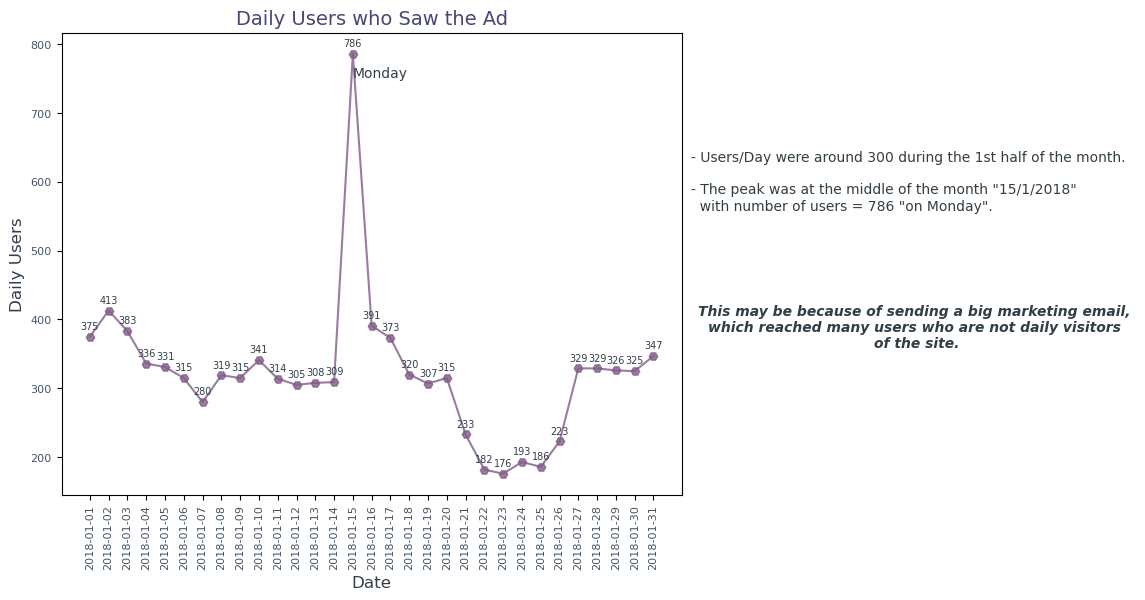

In [442]:
# Visualization - Number of daily users : 
# Data
x= daily_users.date.astype('str').to_list()
y= daily_users.num_users

# Creating the Line Chart
plt.subplots(figsize = (8,6))
plt.plot(x,y,color='#805D87',marker = 'H', alpha=.8)

# Customizing Chart
plt.title('Daily Users who Saw the Ad',fontsize=14,color='#454775')
plt.xlabel('Date',fontsize=12,color='#313E4C')
plt.xticks(rotation=90,fontsize=8,color='#415366')
plt.ylabel('Daily Users',fontsize=12,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')

# Data Annotation with values
for i, v in enumerate(y):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=7,color='#313E4C')

# Findings
text1 =f'''
- Users/Day were around 300 during the 1st half of the month.\n
- The peak was at the middle of the month "15/1/2018" 
  with number of users = {y.max()} "on Monday".\n'''

text2='''
This may be because of sending a big marketing email, 
which reached many users who are not daily visitors 
of the site.'''

plt.text(32,600,text1,va='center',ha='left',color='#313E45')
plt.text(44,400,text2,va='center',ha='center',color='#313E45',fontstyle='italic',weight='semibold', fontsize=10)
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left',color='#313E4C');

<br> 

#### $\color{#454775}{2-}$ *Number of Weekday users:*

In [377]:
# Number of weekday users :
weekday_users = marketing.groupby(['dow']).user_id.count().reset_index()\
                        .rename(columns={'dow':'day','user_id':'num_users'})\
                        .sort_values('num_users', ascending=False)

weekday_users.style.hide()

day,num_users
Mo,1988
We,1637
Tu,1620
Sa,1267
Fr,1166
Th,1156
Su,1151


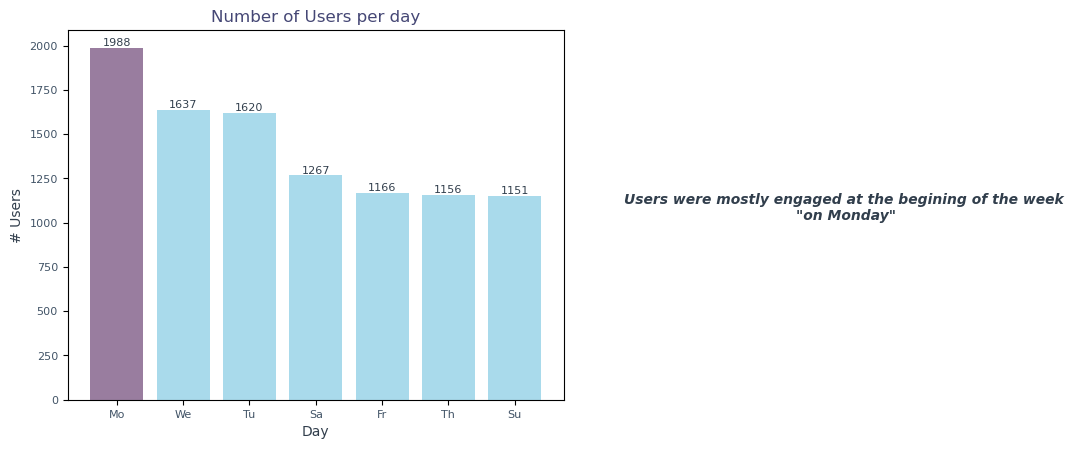

In [378]:
# Visualization - Number of weekday users:
# Data
x= weekday_users.day.to_list()
y=weekday_users.num_users

# Define bar colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y]

# Create the bar chart
plt.bar(x,y, color=colors, alpha=.8)

# Customizing Chart
plt.title('Number of Users per day',fontsize=12,color='#454775')
plt.xlabel('Day',fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('# Users',fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotate bars with their values
for i, v in enumerate(y):
  plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8,color='#313E4C') 

# Findings
text = ''' 
Users were mostly engaged at the begining of the week 
"on Monday"'''
plt.text(11,1000,text,va='bottom',ha='center' ,color='#313E4C',
         fontstyle='italic',weight='semibold',fontsize=10);

<br> 

#### $\color{#454775}{3-}$ *Number of users according to variant classification:*

In [379]:
# Number of users according to variant categories 
var_users = marketing.groupby('variant')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

var_users['pct']=(var_users.num_users/var_users.num_users.sum())

var_users.style.hide().format({'pct':'{:,.2%}'})

variant,num_users,pct
control,5054,50.62%
personalization,4931,49.38%


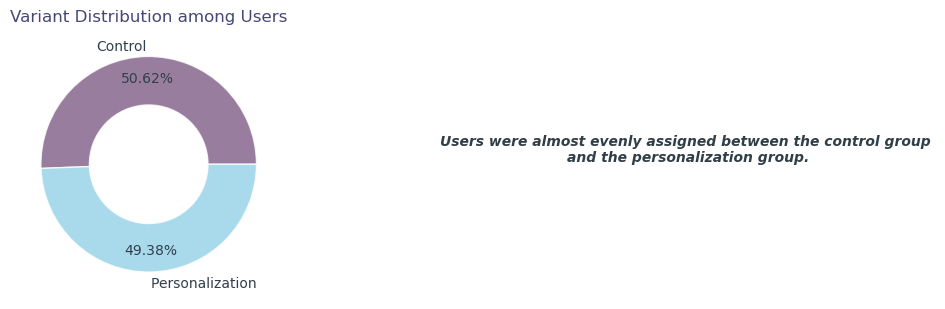

In [380]:
# Visualization - Number of users according to variant categories: 
# Defining colors based on performance
colors = ['#805D87' if x == var_users.pct.max() else '#94D1E7' for x in var_users.pct]

# Creating the Chart
size = 0.45
label_var = 'Control','Personalization '
plt.subplots(figsize = (3.5,3.5))
wedges, texts, autotexts=plt.pie(var_users.pct, radius=1, colors= colors,labels = label_var,autopct='%1.2f%%',
                                 pctdistance=.8,textprops={'fontsize': 10,'color':'#313E4C'}, 
                                 wedgeprops=dict(width=size, edgecolor='w'))

# Customizing Chart
for w in wedges:
    w.set_alpha(0.8)  
plt.title('Variant Distribution among Users', fontsize=12,color='#454775')

# Findings
text = ''' 
Users were almost evenly assigned between the control group 
and the personalization group.'''
plt.text(5,0,text,ha='center',va='bottom',fontsize = 10, 
         weight = 'semibold',fontstyle='italic',color='#313E45');


<br> 

#### $\color{#454775}{4-}$ *Number of converted users vs. non-converted users:*

In [444]:
# Number of converted users vs. non-converted users
converted_users = marketing.groupby('converted')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})

converted_users['pct']=(converted_users.num_users/converted_users.num_users.sum())

converted_users.style.hide().format({'pct':'{:,.2%}'})

converted,num_users,pct
False,8911,89.24%
True,1074,10.76%


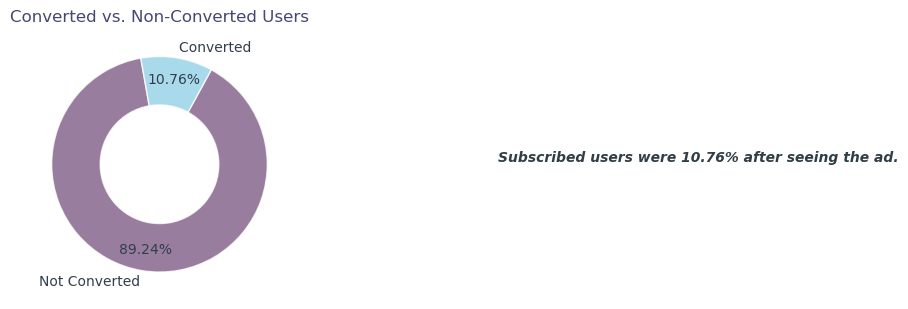

In [446]:
# Visualization - Number of converted users vs. non-converted users: 
# Defining colors based on performance
colors = ['#805D87' if n == converted_users.pct.max() else '#94D1E7' for n in converted_users.pct]

# Creating the Chart
size = 0.45
label_con = 'Not Converted','Converted '
plt.subplots(figsize = (3.5,3.5))
wedges, texts, autotexts=plt.pie(converted_users.pct, radius=1, colors= colors,labels = label_con,autopct='%1.2f%%',
                                 pctdistance=.8,textprops={'fontsize': 10,'color':'#313E4C',}, 
                                 wedgeprops=dict(width=size, edgecolor='w'),startangle=100)

# Customizing the Chart
for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Converted vs. Non-Converted Users', fontsize=12,color='#454775')

# Findings
text = f''' 
Subscribed users were {converted_users.pct.min():.2%} after seeing the ad.'''
plt.text(5,0,text,ha='center',va='bottom',fontsize = 10, 
         weight = 'semibold',fontstyle='italic',color='#313E45');

<br> 

#### $\color{#454775}{5-}$ *Displayed Lanaguage vs. Preferred Language:*

In [383]:
# Displayed Lanaguage vs. Preferred Language
lang_displayed=marketing.groupby('language_displayed')['user_id'].count().reset_index()\
                        .rename(columns={'language_displayed':'Language','user_id':'Displayed'})

lang_preferred=marketing.groupby('language_preferred')['user_id'].count().reset_index()\
                       .rename(columns={'language_preferred':'Language','user_id':'Preferred'})

lang=lang_displayed.merge(lang_preferred,on='Language').sort_values('Displayed')

lang.style.hide()

Language,Displayed,Preferred
Arabic,27,145
German,81,166
Spanish,135,446
English,9742,9228


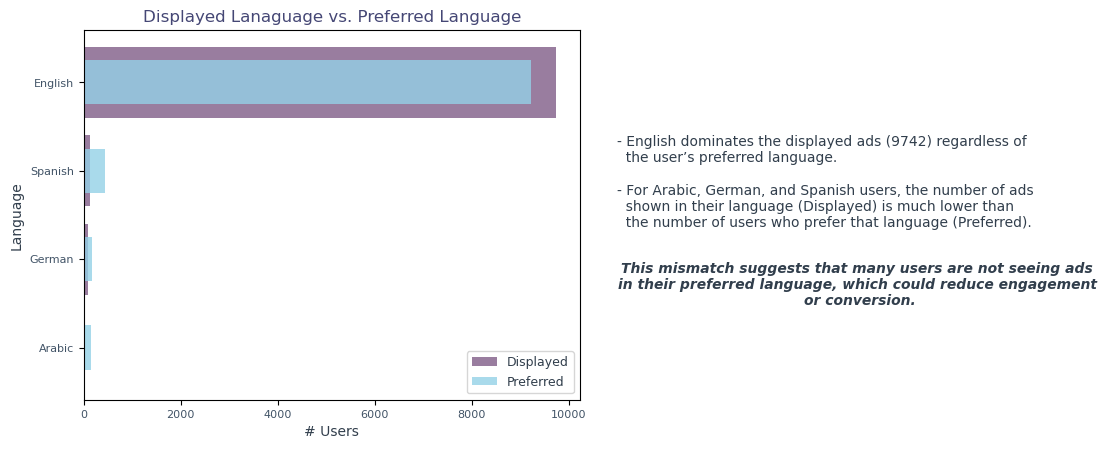

In [447]:
# Visualization - Displayed Lanaguage vs. Preferred Language:
# Data
x=lang.Language.to_list()
y=lang.Displayed
z=lang.Preferred

# Creating the Chart
bin_size=.5
plt.barh(x,y, label='Displayed',color='#805D87',alpha=.8)
plt.barh(x,z,bin_size,label='Preferred', color='#94D1E7',alpha=.8)

# Chart Customization
plt.title('Displayed Lanaguage vs. Preferred Language', fontsize=12,color='#454775')
plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Language', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Findings
text1=f'''
- English dominates the displayed ads ({lang.Displayed.max()}) regardless of 
  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads 
  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
'''
text2='''
This mismatch suggests that many users are not seeing ads 
in their preferred language, which could reduce engagement 
or conversion.
'''
plt.text(11000,1,text1,color='#313E4C'),
plt.text(16000,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{6-}$ *Distribution of age among users:*

In [385]:
# Distribution of age among users
age_distribution = marketing.groupby('age_group').user_id.nunique().reset_index()\
                            .rename(columns={'user_id':'num_users'})

age_distribution['pct']=age_distribution['num_users']/age_distribution['num_users'].sum()

age_distribution.style.hide().format({'pct':'{:,.2%}'})

age_group,num_users,pct
0-18 years,1206,15.31%
19-24 years,1304,16.56%
24-30 years,1218,15.46%
30-36 years,1057,13.42%
36-45 years,1056,13.41%
45-55 years,1056,13.41%
55+ years,979,12.43%


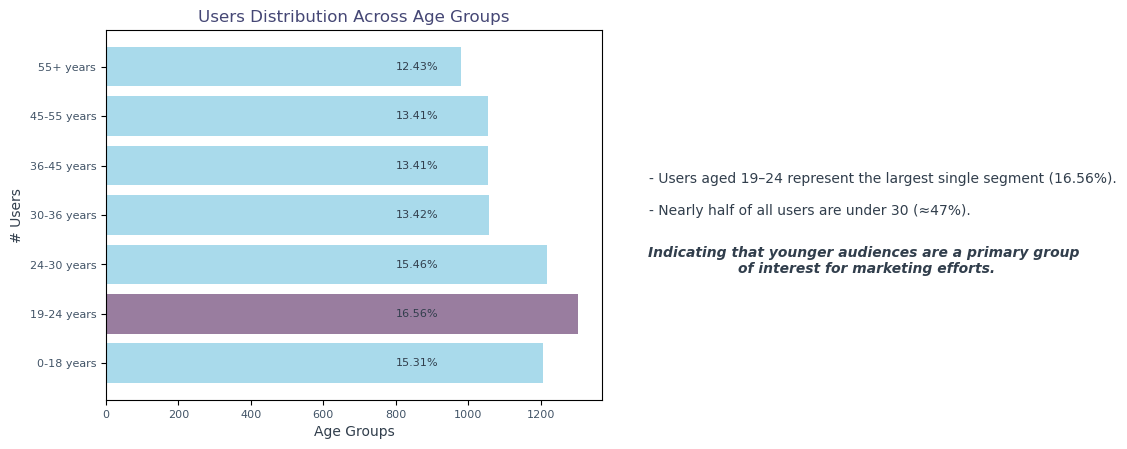

In [448]:
# Visualization - Distribution of age among users:
# Data
x= age_distribution.age_group.to_list()
y=age_distribution.num_users

# Defining colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y] 

# Creating the chart
plt.barh(x,y,alpha=.8,color=colors)

# Customizing the Chart
plt.title('Users Distribution Across Age Groups', fontsize=12,color='#454775')
plt.xlabel('Age Groups', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('# Users', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')

# Annotating bars with values
for i,v in enumerate(age_distribution.pct):
    plt.text(v+800,i,f'{v:.2%}',va='center',ha='left',fontsize=8,color='#313E4C')
    
# Findings
text1= f'''
- Users aged 19–24 represent the largest single segment ({age_distribution.pct.max():.2%}).\n
- Nearly half of all users are under 30 (≈47%).'''
text2=''' 
Indicating that younger audiences are a primary group 
of interest for marketing efforts.
'''
plt.text(1500,3,text1,color='#313E4C')
plt.text(2100,1.5,text2, ha='center',fontstyle='italic',
         weight='semibold', fontsize=10, color='#313E4C');

<br> 

#### $\color{#454775}{7-}$ *Marketing Channels:*

In [457]:
# Number of users for each marketing channel:
ch_users=marketing.groupby('marketing_channel').user_id.count().reset_index().rename(columns={'user_id':"num_users"})\
                  .sort_values('num_users')
ch_users['pct']=ch_users.num_users/ch_users.num_users.sum()
ch_users.style.hide().format({'pct':'{:.2%}'})

marketing_channel,num_users,pct
Email,563,5.64%
Push,991,9.92%
Facebook,1859,18.62%
Instagram,1868,18.71%
House Ads,4704,47.11%


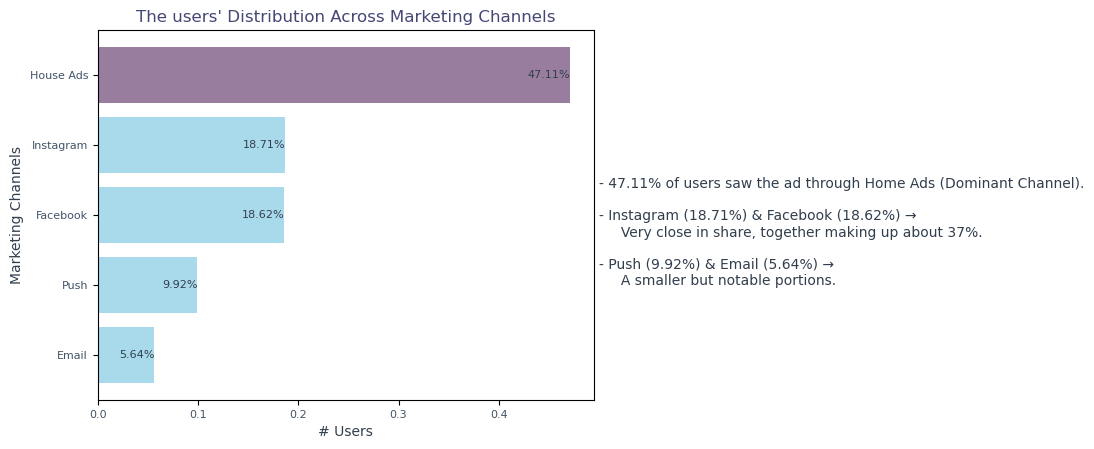

In [462]:
# Visualization - Number of users for each marketing channel:
# Data
x= ch_users.marketing_channel.to_list()
y= ch_users.pct

# Defining colors based on performance
colors = ['#805D87' if n == y.max() else '#94D1E7' for n in y] 

# Creating the chart
plt.barh(x,y, color=colors, alpha=.8)

#Customizing the chart
plt.title("The users' Distribution Across Marketing Channels", fontsize=12,color='#454775')
plt.xlabel('# Users', fontsize=10,color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Marketing Channels', fontsize=10,color='#313E4C')
plt.yticks(fontsize=8, color='#415366')
for i, v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',ha='right', va='center',fontsize=8,color='#313E4C')

# Findings
text=f'''
- {ch_users.pct.max():.2%} of users saw the ad through Home Ads (Dominant Channel).\n
- Instagram ({ch_users.iloc[3,2]:.2%}) & Facebook ({ch_users.iloc[2,2]:.2%}) → 
     Very close in share, together making up about 37%.\n
- Push ({ch_users.iloc[1,2]:.2%}) & Email ({ch_users.iloc[0,2]:.2%}) → 
     A smaller but notable portions.'''
plt.text(.5,1,text,color='#313E4C');

In [463]:
# Subscribing Channels
sub_channel=marketing.groupby('subscribing_channel')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':'subscribers_num'})\
                     .sort_values('subscribers_num')

sub_channel.style.hide()

subscribing_channel,subscribers_num
Push,167
Email,312
House Ads,354
Facebook,444
Instagram,594


In [464]:
# Retained Subscribers 
retained = marketing.query('is_retained == True').groupby('subscribing_channel').is_retained.count().reset_index()\
                    .rename(columns={'is_retained':'retained_num'}).sort_values('retained_num') 

retained.style.hide()

subscribing_channel,retained_num
Push,122
House Ads,198
Email,237
Facebook,320
Instagram,419


In [465]:
# Merging subscribing channeles and retained subscribers
subscribers = sub_channel.merge(retained,on='subscribing_channel')

subscribers['retained_pct']=subscribers['retained_num']/subscribers['subscribers_num']

subscribers['middle_pt']=(subscribers['subscribers_num']/2)

subscribers.style.hide().format({'retained_pct':'{:.2%}','middle_pt':'{:.0f}'})

subscribing_channel,subscribers_num,retained_num,retained_pct,middle_pt
Push,167,122,73.05%,84
Email,312,237,75.96%,156
House Ads,354,198,55.93%,177
Facebook,444,320,72.07%,222
Instagram,594,419,70.54%,297


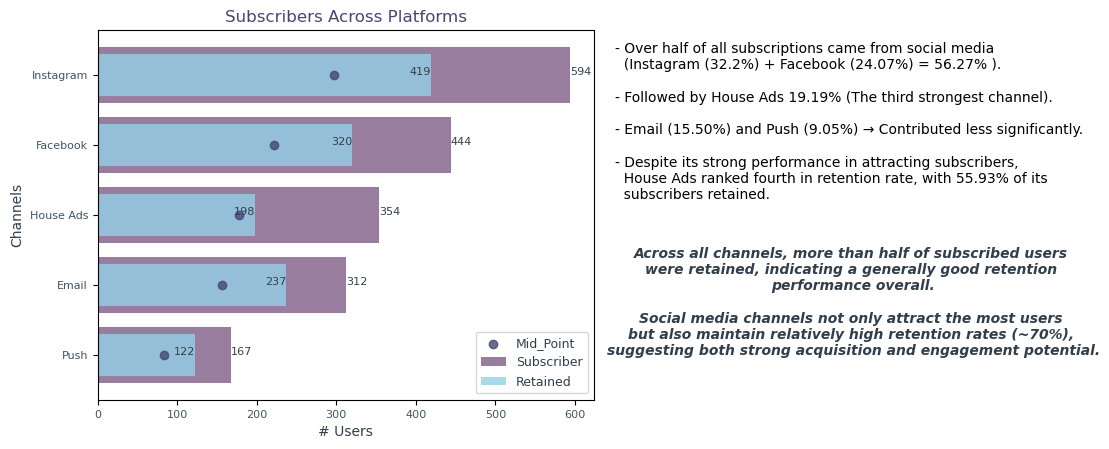

In [392]:
# Visualization - subscribing channeles and retained subscribers
# Data
x= subscribers.subscribing_channel.to_list()
y= subscribers.subscribers_num
z=subscribers.retained_num
mid_point=subscribers.middle_pt

# Creating the chart
size=.6
plt.barh(x,y,alpha=.8, color='#805D87', label='Subscriber')
plt.barh(x,z,size,alpha=.8, color='#94D1E7',label='Retained')
plt.scatter(mid_point,x, label='Mid_Point', color = '#454775', alpha=.8)

# Customizing the chart
plt.title('Subscribers Across Platforms',fontsize=12,color = '#454775')
plt.ylabel('Channels', fontsize=10, color='#313E4C')
plt.yticks(fontsize=8, color='#415366')
plt.xlabel('# Users', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating bars with values
for i,v in enumerate(y): 
    plt.text(v,i,v,fontsize=8, color='#313E4C')
for i,v in enumerate(z): 
    plt.text(v,i,v,ha='right',fontsize=8, color='#313E4C')

# Findings
text1=''' 
- Over half of all subscriptions came from social media 
  (Instagram (32.2%) + Facebook (24.07%) = 56.27% ).\n
- Followed by House Ads 19.19% (The third strongest channel).\n 
- Email (15.50%) and Push (9.05%) → Contributed less significantly.\n
- Despite its strong performance in attracting subscribers, 
  House Ads ranked fourth in retention rate, with 55.93% of its 
  subscribers retained.\n'''
text2='''
Across all channels, more than half of subscribed users 
were retained, indicating a generally good retention 
performance overall.\n
Social media channels not only attract the most users 
but also maintain relatively high retention rates (~70%), 
suggesting both strong acquisition and engagement potential.'''
plt.text(650,2,text1)
plt.text(950,0,text2, ha='center',fontstyle='italic',
         weight='semibold', fontsize=10, color='#313E4C')
plt.show()

<br>

### $\color{#454775}{\sf Influence\;Factors:}$
### $\color{#454775}{Q1:}$ ***What factors most stringly influence user Conversion and Retention Rates?***
#### *Conversion & Retention Rates*


In [395]:
# 1- Overall Conversion Rate
# Creating converted_users table:
converted_users = marketing.query('converted == True')

# Calculating The Overall Conversion Rate
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()

conversion_rate = converted/total_users

print(f'The Overall Conversion Rate = {round(conversion_rate*100,2)}%')

# 2- Overall Retention Rate (spaning 1 month)
# Creating retained_users table:
retained_users = converted_users.query('is_retained == True')

# Calculating The Overall Retention Rate
retained=retained_users.user_id.nunique()

retention_rate = retained/converted

print(f'\nThe Overall Retention Rate  = {round(retention_rate*100,2)}%\n')

The Overall Conversion Rate = 13.92%

The Overall Retention Rate  = 67.09%



<br> 

#### $\color{#454775}{1-}$ *Marketing Channels:*

In [396]:
# Calculating Conversion Rate across marketing channels
converted_ch=converted_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'converted'})

users_ch = marketing.groupby('marketing_channel').user_id.nunique().reset_index()\
                    .rename(columns={'marketing_channel':'channel','user_id':'total_users'})

conversion_ch =users_ch.merge(converted_ch, on ='channel')

conversion_ch['conversion_rate']=conversion_ch['converted']/conversion_ch['total_users']

conversion_ch = conversion_ch.sort_values('conversion_rate', ascending= False)

conversion_ch.style.hide().format({'conversion_rate':'{:,.2%}'})

channel,total_users,converted,conversion_rate
Email,553,187,33.82%
Instagram,1740,232,13.33%
Facebook,1758,221,12.57%
Push,972,77,7.92%
House Ads,3968,298,7.51%


In [397]:
# Calculating Retention Rate across marketing channels
retained_ch=retained_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                          .rename(columns={'subscribing_channel':'channel','user_id':'retained'})

retention_ch = converted_ch.merge(retained_ch, on='channel')

retention_ch['retention_rate']=retention_ch['retained']/retention_ch['converted']

retention_ch=retention_ch.sort_values('retention_rate', ascending=False)

retention_ch.style.hide().format({'retention_rate':'{:,.2%}'})

channel,converted,retained,retention_rate
Email,187,144,77.01%
Push,77,54,70.13%
Facebook,221,152,68.78%
Instagram,232,158,68.10%
House Ads,298,173,58.05%


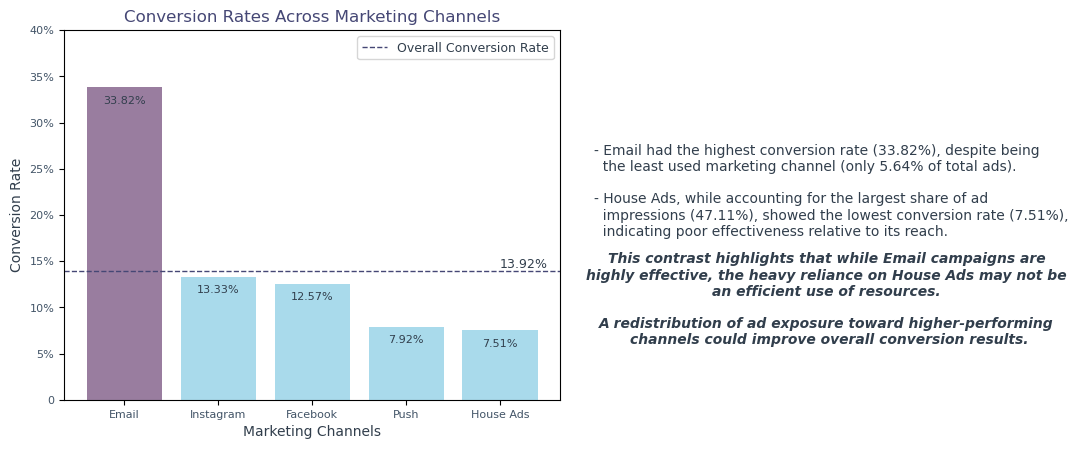

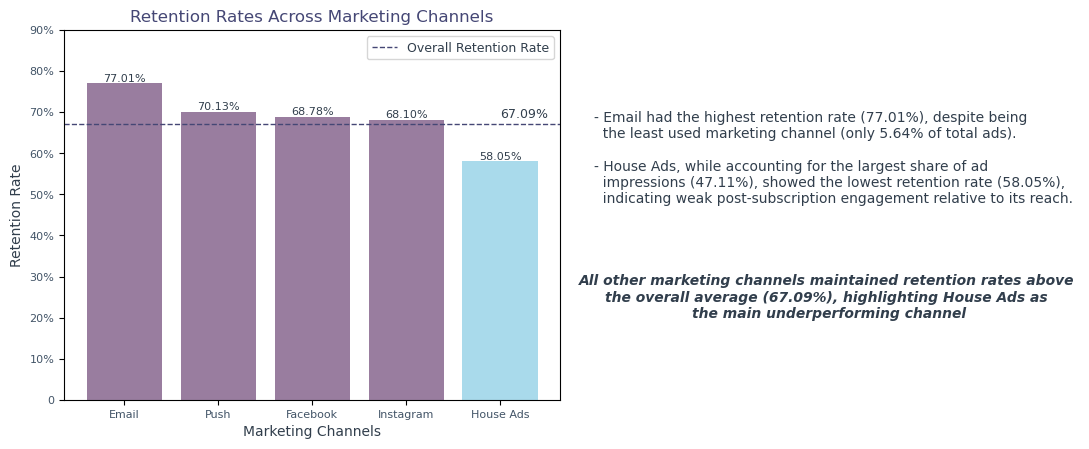

In [409]:
# 1- Visualization - Conversion Rates Across Marketing Channels: 
# Data
x= conversion_ch.channel.to_list()
y= conversion_ch.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors, alpha=.8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Marketing Channels', fontsize=12,color='#454775')
plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.45,.05),['0','5%','10%','15%','20%','25%','30%','35%','40%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,.14, f'{conversion_rate:.2%}', ha= 'left', va ='bottom',color='#313E4C', fontsize=9)
for i,v in enumerate(y):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text1=f'''
- Email had the highest conversion rate ({y.max():.2%}), despite being 
  the least used marketing channel (only {ch_users.pct.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions ({ch_users.pct.max():.2%}), showed the lowest conversion rate ({y.min():.2%}), 
  indicating poor effectiveness relative to its reach.\n'''
text2='''
This contrast highlights that while Email campaigns are 
highly effective, the heavy reliance on House Ads may not be 
an efficient use of resources. \n
A redistribution of ad exposure toward higher-performing 
channels could improve overall conversion results.'''
plt.text(5,.16,text1, color='#313E4C')
plt.text(7.5,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();


# 2- Visualization - Retention Rates Across Marketing Channels: 
# Data
x= retention_ch.channel.to_list()
y= retention_ch.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors, alpha=.8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Retention Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Marketing Channels', fontsize=12, color='#454775')
plt.xlabel('Marketing Channels', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8,color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,1,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C')

# Annotating chart with values
plt.text(4,.68, f'{retention_rate:.2%}', ha= 'left', va ='bottom',color='#313E4C', fontsize=9)
for i,v in enumerate(y):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text3=f'''
- Email had the highest retention rate ({y.max():.2%}), despite being 
  the least used marketing channel (only {ch_users.pct.min():.2%} of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions ({ch_users.pct.max():.2%}), showed the lowest retention rate ({y.min():.2%}), 
  indicating weak post-subscription engagement relative to its reach.\n
'''
text4=f'''
All other marketing channels maintained retention rates above 
the overall average ({retention_rate:.2%}), highlighting House Ads as 
the main underperforming channel'''
plt.text(5,.4,text3, color='#313E4C')
plt.text(7.5,.2,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

In [399]:
# Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
performance_ch=conversion_ch.merge(retention_ch,on='channel')\
                            .loc[:,['channel','conversion_rate','retention_rate']]

performance_ch.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

channel,conversion_rate,retention_rate
Email,33.82%,77.01%
Instagram,13.33%,68.10%
Facebook,12.57%,68.78%
Push,7.92%,70.13%
House Ads,7.51%,58.05%


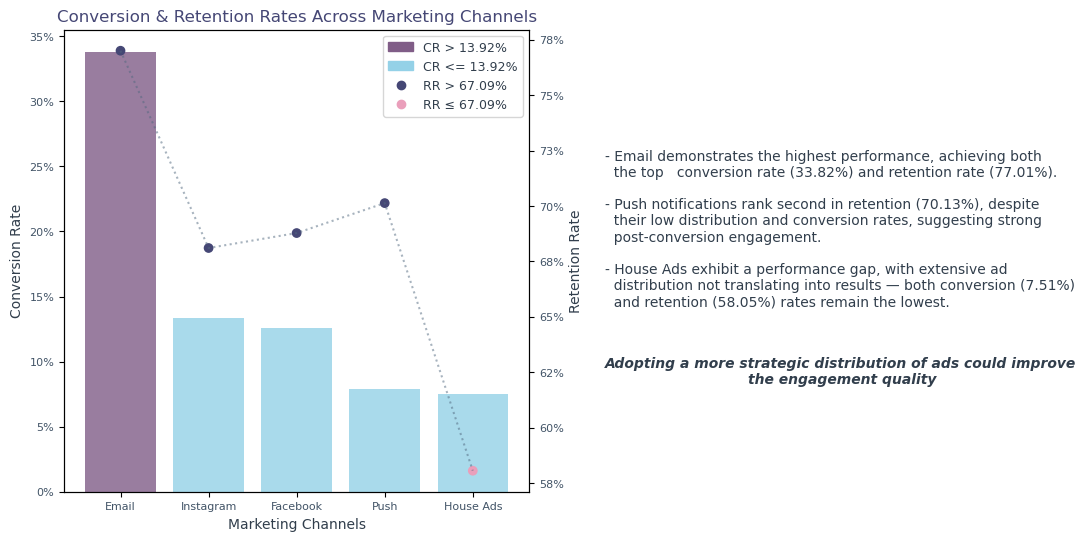

In [417]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Marketing Channels: 
# Data
x=performance_ch.channel.to_list()
y=performance_ch.conversion_rate
z=performance_ch.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6, 6))

# 1- Conversion Rate (Bar)
ax1.bar(x,y, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Marketing Channels', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text1=f'''
- Email demonstrates the highest performance, achieving both 
  the top   conversion rate ({y.max():.2%}) and retention rate ({z.max():.2%}).\n
- Push notifications rank second in retention ({z[3]:.2%}), despite 
  their low distribution and conversion rates, suggesting strong 
  post-conversion engagement.\n
- House Ads exhibit a performance gap, with extensive ad 
  distribution not translating into results — both conversion ({y.min():.2%})
  and retention ({z.min():.2%}) rates remain the lowest.'''
text2='''
Adopting a more strategic distribution of ads could improve 
the engagement quality'''
plt.text(5.5,.655,text1, color='#313E4C')
plt.text(8.2,.62,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{2-}$ *Variant Classification:*

In [420]:
# Calculating Conversion Rate across variant classifications
converted_var=converted_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_var = marketing.groupby('variant').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})

conversion_var =users_var.merge(converted_var, on ='variant')

conversion_var['conversion_rate']=conversion_var['converted']/conversion_var['total_users']

conversion_var = conversion_var.sort_values('conversion_rate', ascending= False)

conversion_var.style.hide().format({'conversion_rate':'{:,.2%}'})

variant,total_users,converted,conversion_rate
personalization,4089,687,16.80%
control,3704,344,9.29%


In [421]:
# Calculating Retention Rate witnin Variant Classifications
retained_var=retained_users.groupby('variant').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})

retention_var = converted_var.merge(retained_var, on='variant')

retention_var['retention_rate']=retention_var['retained']/retention_var['converted']

retention_var=retention_var.sort_values('retention_rate', ascending=False)

retention_var.style.hide().format({'retention_rate':'{:,.2%}'})

variant,converted,retained,retention_rate
control,344,242,70.35%
personalization,687,455,66.23%


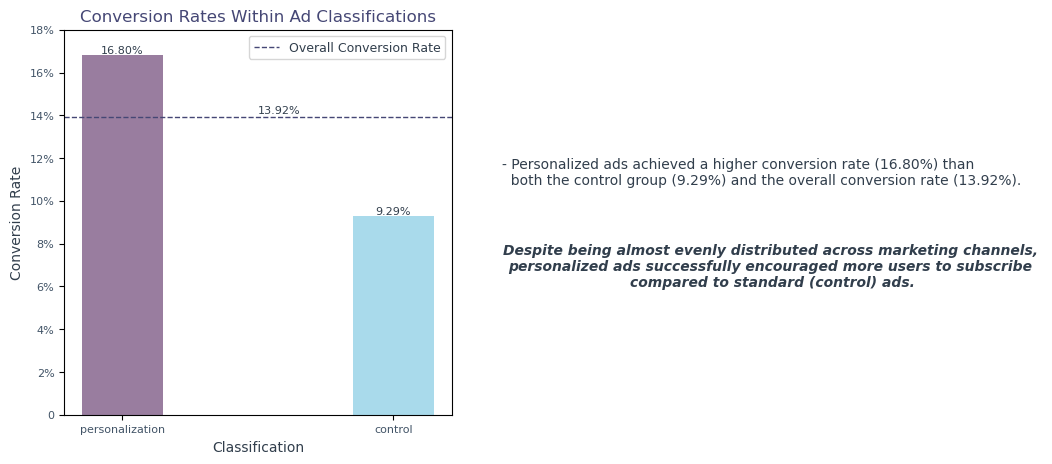

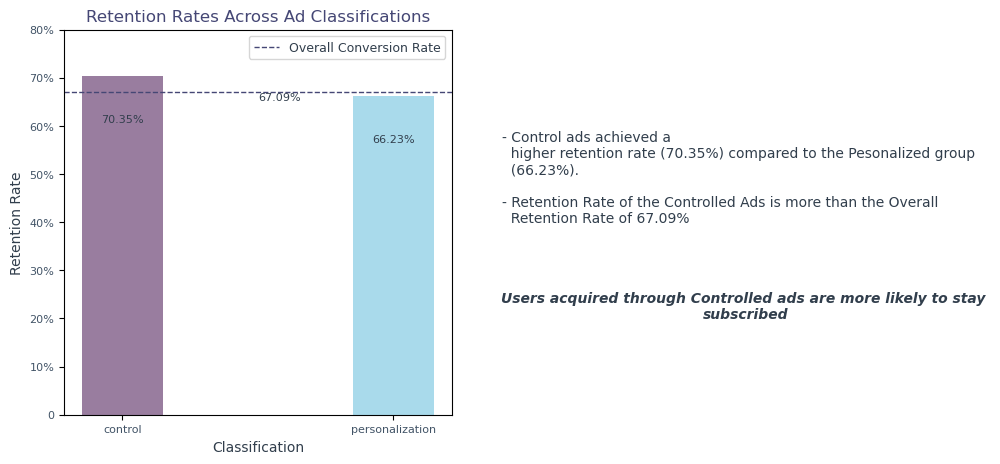

In [427]:
# 1- Visualization - Conversion Rates Within Variant Classifications: 
# Data
x= conversion_var.variant.to_list()
y= conversion_var.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Within Ad Classifications', fontsize=12,color='#454775')
plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.2,.02),['0','2%','4%','6%','8%','10%','12%','14%','16%','18%'], fontsize=8,color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(.5,.14, f'{conversion_rate:.2%}', ha= 'left', va ='bottom', fontsize=8, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text1=f'''
- Personalized ads achieved a higher conversion rate ({y.max():.2%}) than 
  both the control group ({y.min():.2%}) and the overall conversion rate ({conversion_rate:.2%}).\n'''
text2='''
Despite being almost evenly distributed across marketing channels, 
personalized ads successfully encouraged more users to subscribe 
compared to standard (control) ads.'''
plt.text(1.4,.1,text1,color='#313E4C')
plt.text(2.4,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show()

# 2-Visualization - Retention Rates Across Variant Classifications: 
# Data
x= retention_var.variant.to_list()
y= retention_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Retention Rates Across Ad Classifications', fontsize=12,color='#454775')
plt.xlabel('Classification', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%'], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(.5,.65, f'{retention_rate:.2%}', ha= 'left', va ='bottom', fontsize=8, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v-.1,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text3=f'''
- Control ads achieved a 
  higher retention rate ({y.max():.2%}) compared to the Pesonalized group 
  ({y.min():.2%}).\n
- Retention Rate of the Controlled Ads is more than the Overall 
  Retention Rate of {retention_rate:.2%}'''
text4='''
Users acquired through Controlled ads are more likely to stay 
subscribed'''
plt.text(1.4,.4,text3,color='#313E4C')
plt.text(2.3,.2,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show();

In [428]:
# Comparing Conversion Rates with Retention Rates Within Variant Classification: 
performance_var=conversion_var.merge(retention_var,on='variant')\
                            .loc[:,['variant','conversion_rate','retention_rate']]

performance_var.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

variant,conversion_rate,retention_rate
personalization,16.80%,66.23%
control,9.29%,70.35%


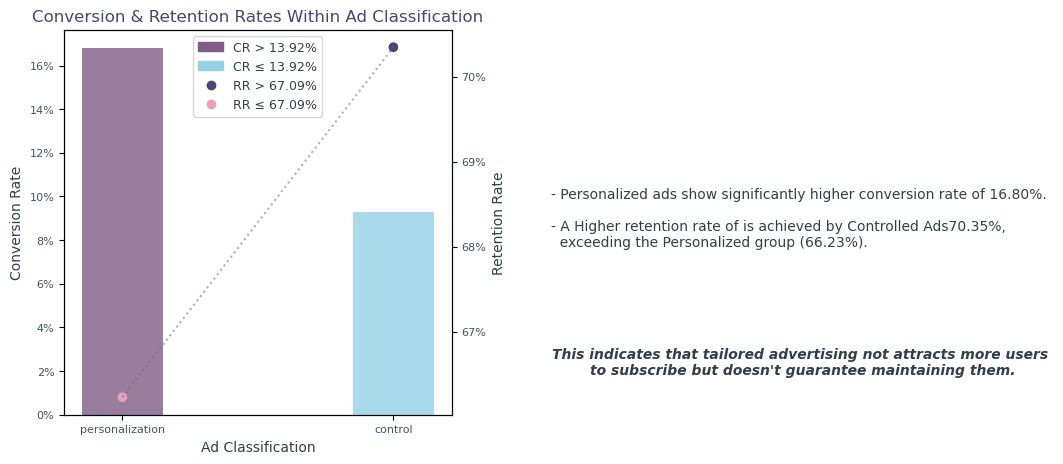

In [438]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Variant Classification: 
# Data
x=performance_var.variant.to_list()
y=performance_var.conversion_rate
z=performance_var.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(x,y,width=.3, alpha=.8, color=colors)

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2)

# Customizing the chart
plt.title('Conversion & Retention Rates Within Ad Classification', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Classification', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label=f'CR > {conversion_rate:.2%}')
below_cr = mpatches.Patch(color='#94D1E7', label=f'CR ≤ {conversion_rate:.2%}')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label=f'RR > {retention_rate:.2%}')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label=f'RR ≤ {retention_rate:.2%}')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper center')

# Findings
text1=f'''
- Personalized ads show significantly higher conversion rate of {y.max():.2%}.\n 
- A Higher retention rate of is achieved by Controlled Ads{z.max():.2%},  
  exceeding the Personalized group ({z.min():.2%}).'''
text2='''
This indicates that tailored advertising not attracts more users 
to subscribe but doesn't guarantee maintaining them.'''
plt.text(1.58,.68,text1, color='#313E4C')
plt.text(2.51,.665,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{3-}$ *Displayed Language:*

In [439]:
# Calculating Conversion Rate across Displayed Languages
converted_displayed_lang=converted_users.groupby('language_displayed').user_id.nunique().reset_index()\
                             .rename(columns={'language_displayed':'language','user_id':'converted'})

users_displayed_lang = marketing.groupby('language_displayed').user_id.nunique().reset_index()\
                    .rename(columns={'language_displayed':'language','user_id':'total_users'})

conversion_displayed_lang =users_displayed_lang.merge(converted_displayed_lang, on ='language')

conversion_displayed_lang['conversion_rate']=conversion_displayed_lang['converted']/conversion_displayed_lang['total_users']

conversion_displayed_lang=conversion_displayed_lang.sort_values('conversion_rate',ascending=False)

conversion_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

language,total_users,converted,conversion_rate
German,74,53,71.62%
Arabic,24,12,50.00%
Spanish,120,24,20.00%
English,7154,926,12.94%


In [440]:
# Calculating Retention Rate across Displayed Languages
retained_displayed_lang=retained_users.groupby('language_displayed').user_id.nunique().reset_index()\
                             .rename(columns={'language_displayed':'language','user_id':'retained'})

retention_displayed_lang = converted_displayed_lang.merge(retained_displayed_lang, on='language')

retention_displayed_lang['retention_rate']=retention_displayed_lang['retained']/retention_displayed_lang['converted']

retention_displayed_lang=retention_displayed_lang.sort_values('retention_rate', ascending=False)

retention_displayed_lang.style.hide().format({'retention_rate':'{:,.2%}'})

language,converted,retained,retention_rate
English,926,623,67.28%
Spanish,24,16,66.67%
German,53,35,66.04%
Arabic,12,7,58.33%


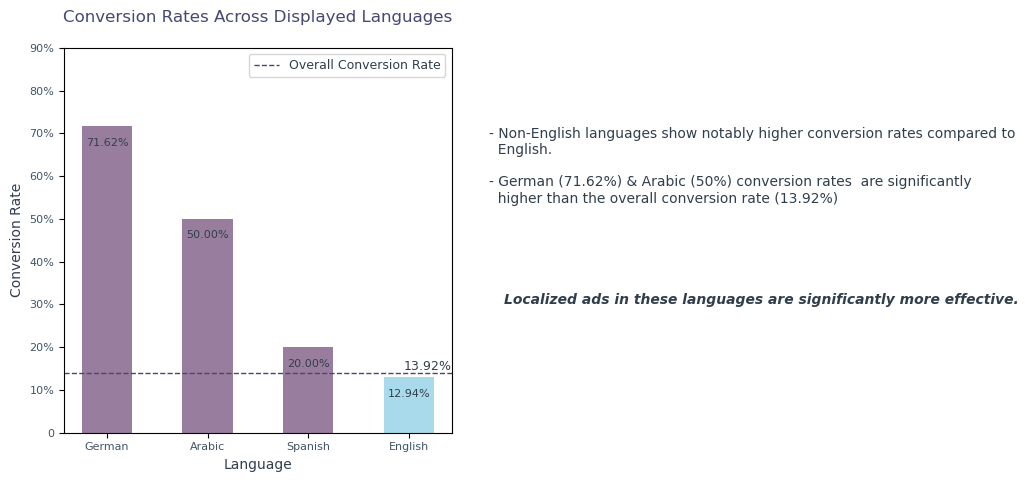

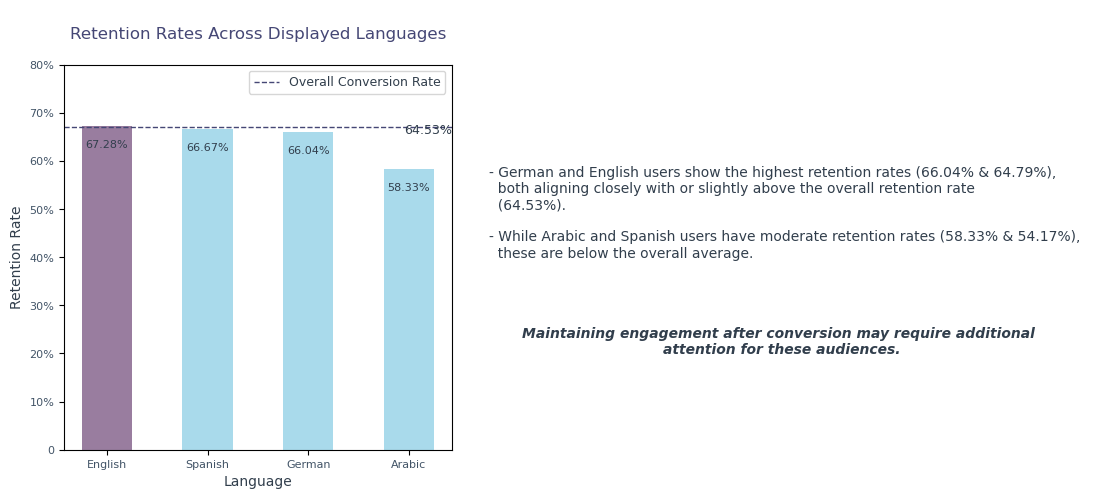

In [441]:
# 1- Visualization - Conversion Rates Across Displayed Languages: 
# Data
x= conversion_displayed_lang.language.to_list()
y= conversion_displayed_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,.5, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Displayed Languages\n', fontsize=12, color='#454775')
plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,1,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.95,.14, '13.92%', ha= 'left', va ='bottom', fontsize=9, color='#313E4C')
for i,v in enumerate(sorted(y,reverse=True)):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text1='''
- Non-English languages show notably higher conversion rates compared to 
  English.\n
- German (71.62%) & Arabic (50%) conversion rates  are significantly 
  higher than the overall conversion rate (13.92%)
'''
text2='''
Localized ads in these languages are significantly more effective.'''
plt.text(3.8,.5,text1,color='#313E4C')
plt.text(6.5,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show()


# 2- Visualization - Retention Rates Across Displayed Languages: 
# Data
x= retention_displayed_lang.language.to_list()
y= retention_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,.5, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Displayed Languages\n', fontsize=12, color='#454775')
plt.xlabel('Language', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%'],fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(2.95,.65, '64.53%', ha= 'left', va ='bottom', fontsize=9, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text1='''
- German and English users show the highest retention rates (66.04% & 64.79%), 
  both aligning closely with or slightly above the overall retention rate 
  (64.53%).\n 
- While Arabic and Spanish users have moderate retention rates (58.33% & 54.17%), 
  these are below the overall average.'''
text2='''
Maintaining engagement after conversion may require additional 
attention for these audiences.'''
plt.text(3.8,.4,text1,color='#313E4C')
plt.text(6.7,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show()

In [334]:
# Comparing Conversion Rates with Retention Rates Across Displayed Languages: 
performance_displayed_lang=conversion_displayed_lang.merge(retention_displayed_lang,on='language')\
                            .loc[:,['language','conversion_rate','retention_rate']]

performance_displayed_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

language,conversion_rate,retention_rate
German,71.62%,66.04%
Arabic,50.00%,58.33%
Spanish,20.00%,54.17%
English,12.94%,64.79%


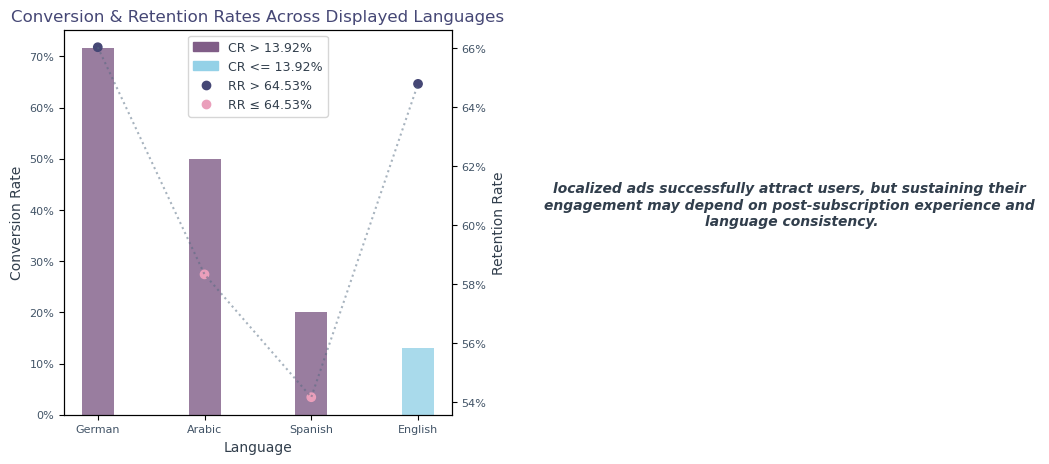

In [335]:
# Visualization - Comparing Conversion Rates with Retention Rates Across Displayed Languages:
# Data
x=performance_displayed_lang.language.to_list()
y=performance_displayed_lang.conversion_rate
z=performance_displayed_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(x,y,width=.3, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Displayed Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below_cr = mpatches.Patch(color='#94D1E7', label='CR ≤ 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 67.09%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 67.09%')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper center')

# Findings
text='''
localized ads successfully attract users, but sustaining their 
engagement may depend on post-subscription experience and 
language consistency.'''
plt.text(6.5,.6,text, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{4-}$ *Matched Language:*

In [336]:
# Calculating Conversion Rate across Matched Languages
converted_lang=converted_users.groupby('matched_lang').user_id.nunique().reset_index()\
                             .rename(columns={'matched_lang':'language_status','user_id':'converted'})

users_lang = marketing.groupby('matched_lang').user_id.nunique().reset_index()\
                    .rename(columns={'matched_lang':'language_status','user_id':'total_users'})

conversion_lang =users_lang.merge(converted_lang, on ='language_status')

conversion_lang['conversion_rate']=conversion_lang['converted']/conversion_lang['total_users']

conversion_lang['language_status']=np.where(conversion_lang['language_status']==True,'Matched','Not_Matched')

conversion_lang=conversion_lang.sort_values('conversion_rate',ascending=False)

conversion_lang.style.hide().format({'conversion_rate':'{:,.2%}'})

language_status,total_users,converted,conversion_rate
Matched,6975,988,14.16%
Not_Matched,403,27,6.70%


In [337]:
# Calculating Retention Rate across Matched & Not-Matched Languages
retained_lang=retained_users.groupby('matched_lang').user_id.nunique().reset_index()\
                             .rename(columns={'matched_lang':'language_status','user_id':'retained'})

retention_lang = converted_lang.merge(retained_lang, on='language_status')

retention_lang['retention_rate']=retention_lang['retained']/retention_lang['converted']

retention_lang['language_status']=np.where(retention_lang['language_status']==True,'Matched','Not_Matched')

retention_lang=retention_lang.sort_values('retention_rate', ascending=False)

retention_lang.style.hide().format({'retention_rate':'{:,.2%}'})

language_status,converted,retained,retention_rate
Matched,988,642,64.98%
Not_Matched,27,13,48.15%


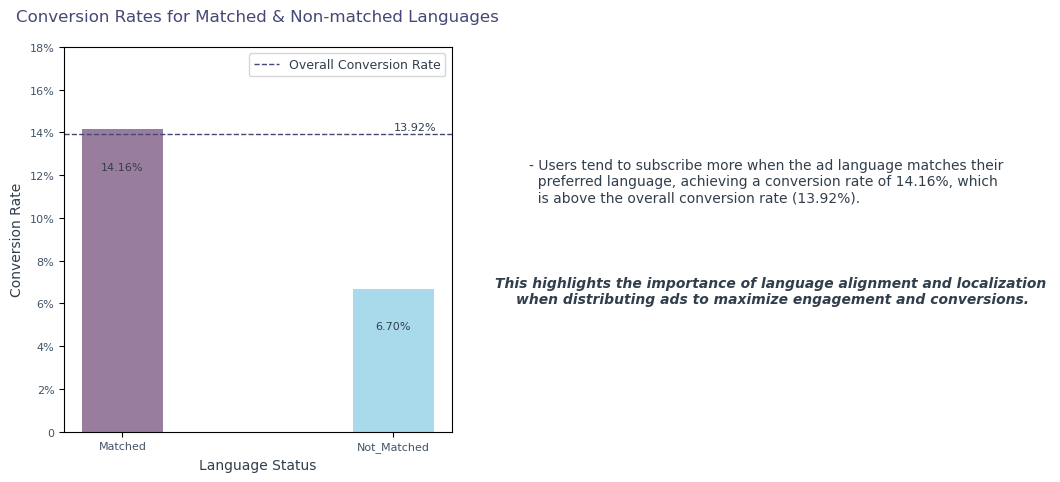

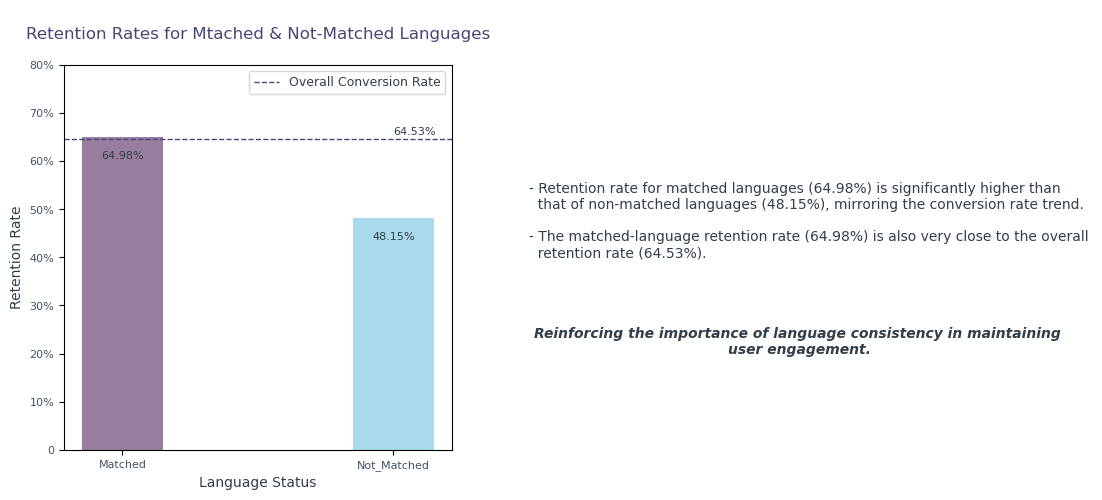

In [338]:
# 1- Visualization - Conversion Rates for Matched & Non-matched Languages: 
# Data
x= conversion_lang.language_status.to_list()
y= conversion_lang.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates for Matched & Non-matched Languages\n', fontsize=12, color='#454775')
plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Conversion Rate', fontsize=10,color='#313E4C')
plt.yticks(np.arange(0,.2,.02),['0','2%','4%','6%','8%','10%','12%','14%','16%','18%'], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,.14, '13.92%', ha= 'left', va ='bottom', fontsize=8, color='#313E4C')
for i,v in enumerate(sorted(y,reverse=True)):
    plt.text(i,v-.02,f'{v:.2%}',va='bottom',ha='center', fontsize=8,color='#313E4C')

# Findings 
text1='''
- Users tend to subscribe more when the ad language matches their 
  preferred language, achieving a conversion rate of 14.16%, which 
  is above the overall conversion rate (13.92%).\n'''
text2='''
This highlights the importance of language alignment and localization 
when distributing ads to maximize engagement and conversions.'''
plt.text(1.5,.1,text1,color='#313E4C')
plt.text(2.4,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show()


# 2- Visualization - Retention Rates for Mtached & Not-Matched Languages: 
# Data
x= retention_lang.language_status.to_list()
y= retention_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (5,5))
plt.bar(x,y,width=.3, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates for Mtached & Not-Matched Languages\n', fontsize=12, color='#454775')
plt.xlabel('Language Status', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.9,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%'],fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(1,.65, '64.53%', ha= 'left', va ='bottom', fontsize=8, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text1='''
- Retention rate for matched languages (64.98%) is significantly higher than
  that of non-matched languages (48.15%), mirroring the conversion rate trend.\n
- The matched-language retention rate (64.98%) is also very close to the overall 
  retention rate (64.53%).'''
text2='''
Reinforcing the importance of language consistency in maintaining 
user engagement.'''
plt.text(1.5,.4,text1,color='#313E4C')
plt.text(2.5,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10,color='#313E4C')
plt.show()

In [339]:
# Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages: 
performance_lang=conversion_lang.merge(retention_lang,on='language_status')\
                            .loc[:,['language_status','conversion_rate','retention_rate']]

performance_lang.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

language_status,conversion_rate,retention_rate
Matched,14.16%,64.98%
Not_Matched,6.70%,48.15%


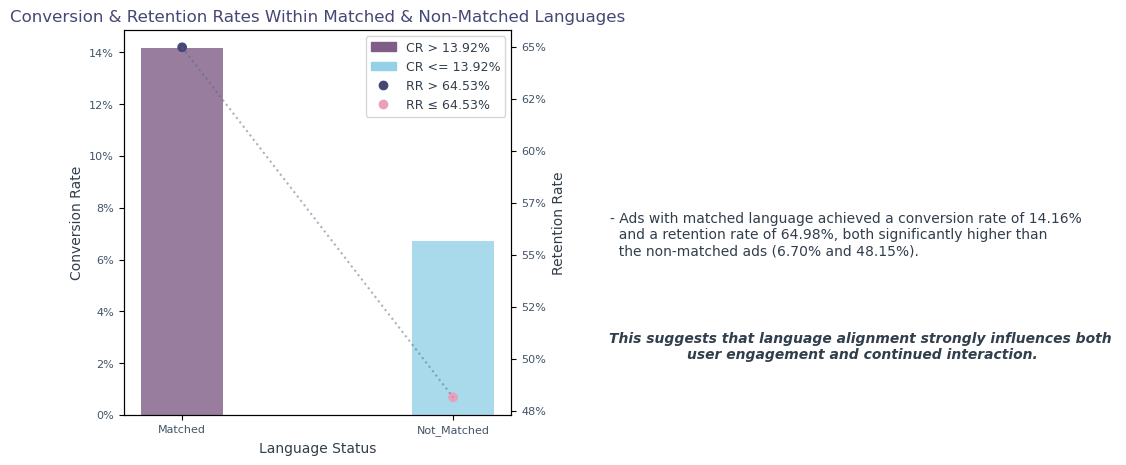

In [340]:
# Visualization - Comparing Conversion Rates with Retention Rates Within Matched & Not-Matched Languages:
# Data
x=performance_lang.language_status.to_list()
y=performance_lang.conversion_rate
z=performance_lang.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(x,y,width=.3, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Within Matched & Non-Matched Languages', fontsize=12, color='#454775')

ax1.set_xlabel('Language Status', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below_cr = mpatches.Patch(color='#94D1E7', label='CR <= 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 67.09%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 67.09%')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C')

# Findings
text1='''
- Ads with matched language achieved a conversion rate of 14.16% 
  and a retention rate of 64.98%, both significantly higher than 
  the non-matched ads (6.70% and 48.15%).'''
text2='''
This suggests that language alignment strongly influences both 
user engagement and continued interaction.'''
plt.text(1.58,.55,text1, color='#313E4C')
plt.text(2.51,.5,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{5-}$ *Age Groups:*

In [341]:
# Calculating Conversion Rate within Age Groups:
converted_age=converted_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_age = marketing.groupby('age_group').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})

conversion_age =users_age.merge(converted_age, on ='age_group')

conversion_age['conversion_rate']=conversion_age['converted']/conversion_age['total_users']


conversion_age.style.hide().format({'conversion_rate':'{:,.2%}'})

age_group,total_users,converted,conversion_rate
0-18 years,1206,192,15.92%
19-24 years,1304,303,23.24%
24-30 years,1218,228,18.72%
30-36 years,1057,77,7.28%
36-45 years,1056,74,7.01%
45-55 years,1056,75,7.10%
55+ years,979,76,7.76%


In [342]:
# Calculating Retention Rate within Age Groups:
retained_age=retained_users.groupby('age_group').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})

retention_age = converted_age.merge(retained_age, on='age_group')

retention_age['retention_rate']=retention_age['retained']/retention_age['converted']

retention_age.style.hide().format({'retention_rate':'{:,.2%}'})

age_group,converted,retained,retention_rate
0-18 years,192,124,64.58%
19-24 years,303,209,68.98%
24-30 years,228,153,67.11%
30-36 years,77,46,59.74%
36-45 years,74,41,55.41%
45-55 years,75,41,54.67%
55+ years,76,51,67.11%


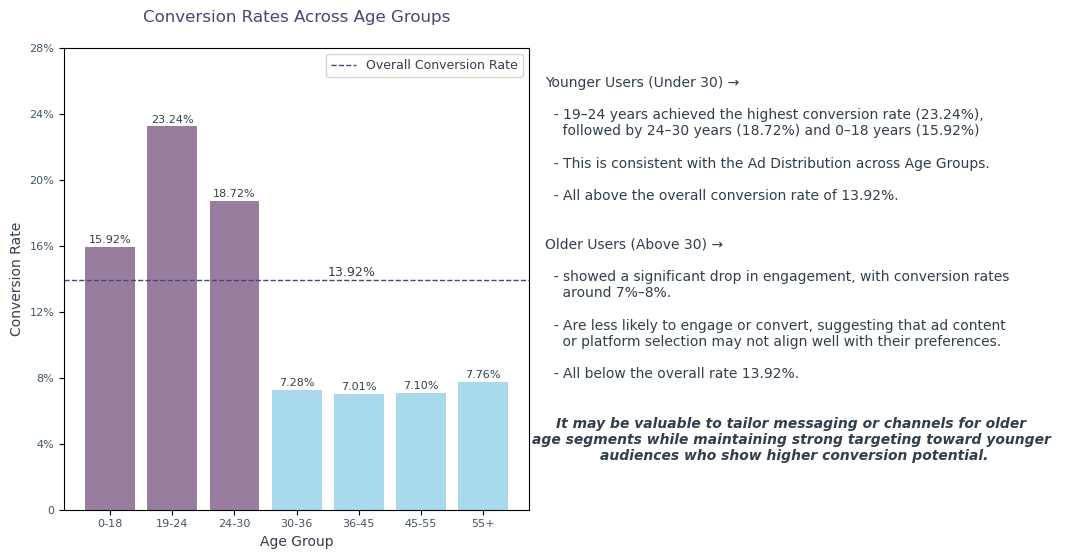

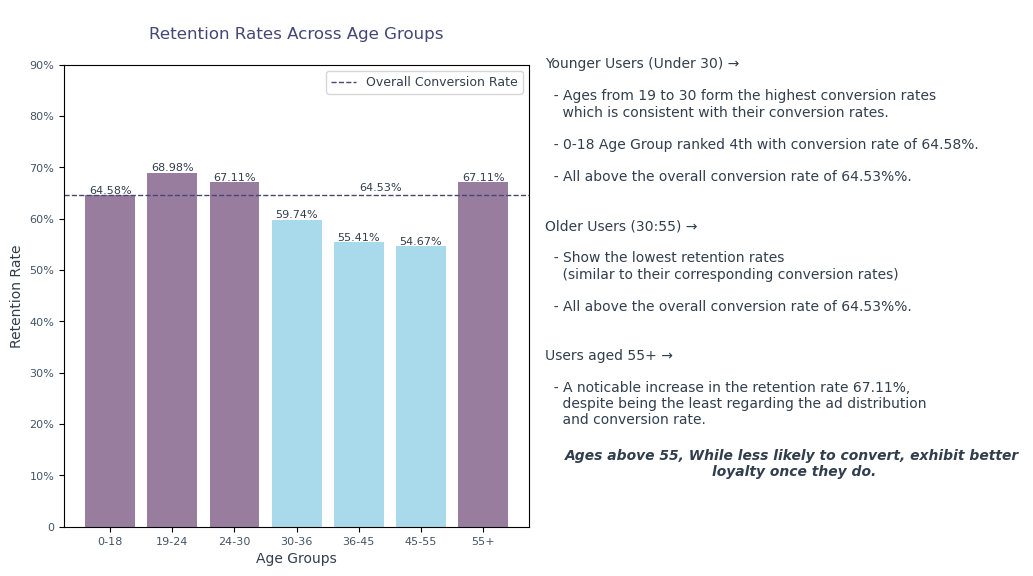

In [343]:
# 1- Visualization - Conversion Rates Across Age Groups: 
# Data
x= [a.replace(' years', '') for a in conversion_age.age_group.to_list()]
y= conversion_age.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(x,y, color=colors,alpha = .8)
plt.axhline(y=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('Conversion Rates Across Age Groups\n', fontsize=12, color='#454775')
plt.xlabel('Age Group', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,.32,.04),['0','4%','8%','12%','16%','20%','24%','28%'], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(3.5,.14, '13.92%', ha= 'left', va ='bottom', fontsize=9, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v+.001,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text1='''
Younger Users (Under 30) → \n
  - 19–24 years achieved the highest conversion rate (23.24%), 
    followed by 24–30 years (18.72%) and 0–18 years (15.92%)\n
  - This is consistent with the Ad Distribution across Age Groups.\n 
  - All above the overall conversion rate of 13.92%.\n\n
Older Users (Above 30) → \n
  - showed a significant drop in engagement, with conversion rates 
    around 7%–8%. \n
  - Are less likely to engage or convert, suggesting that ad content 
    or platform selection may not align well with their preferences.\n
  - All below the overall rate 13.92%.\n\n'''
text2='''
It may be valuable to tailor messaging or channels for older 
age segments while maintaining strong targeting toward younger 
audiences who show higher conversion potential.'''
plt.text(7,.06,text1, color='#313E4C')
plt.text(11,0.03,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Across Age Groups: 
# Data
x= [a.replace(' years','') for a in retention_age.age_group.to_list()]
y= retention_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.bar(x,y, color=colors,alpha = .8)
plt.axhline(y=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.title('\nRetention Rates Across Age Groups\n', fontsize=12, color='#454775')
plt.xlabel('Age Groups', fontsize=10, color='#313E4C')
plt.xticks(fontsize=8, color='#415366')
plt.ylabel('Retention Rate', fontsize=10, color='#313E4C')
plt.yticks(np.arange(0,1,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(4,.65, '64.53%', ha= 'left', va ='bottom', fontsize=8, color='#313E4C')
for i,v in enumerate(y):
    plt.text(i,v,f'{v:.2%}',va='bottom',ha='center', fontsize=8, color='#313E4C')

# Findings 
text3='''
Younger Users (Under 30) →\n
  - Ages from 19 to 30 form the highest conversion rates
    which is consistent with their conversion rates.\n
  - 0-18 Age Group ranked 4th with conversion rate of 64.58%.\n
  - All above the overall conversion rate of 64.53%%.\n\n
Older Users (30:55) →\n
  - Show the lowest retention rates 
    (similar to their corresponding conversion rates)\n
  - All above the overall conversion rate of 64.53%%. \n\n
Users aged 55+ → \n
  - A noticable increase in the retention rate 67.11%, 
    despite being the least regarding the ad distribution 
    and conversion rate.'''
text4='''
Ages above 55, While less likely to convert, exhibit better 
loyalty once they do.'''
plt.text(7,.2,text3, color='#313E4C')
plt.text(11,.1,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [344]:
# Comparing Conversion Rates with Retention Rates within Age Groups:
performance_age=conversion_age.merge(retention_age,on='age_group')\
                            .loc[:,['age_group','conversion_rate','retention_rate']]

performance_age.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

age_group,conversion_rate,retention_rate
0-18 years,15.92%,64.58%
19-24 years,23.24%,68.98%
24-30 years,18.72%,67.11%
30-36 years,7.28%,59.74%
36-45 years,7.01%,55.41%
45-55 years,7.10%,54.67%
55+ years,7.76%,67.11%


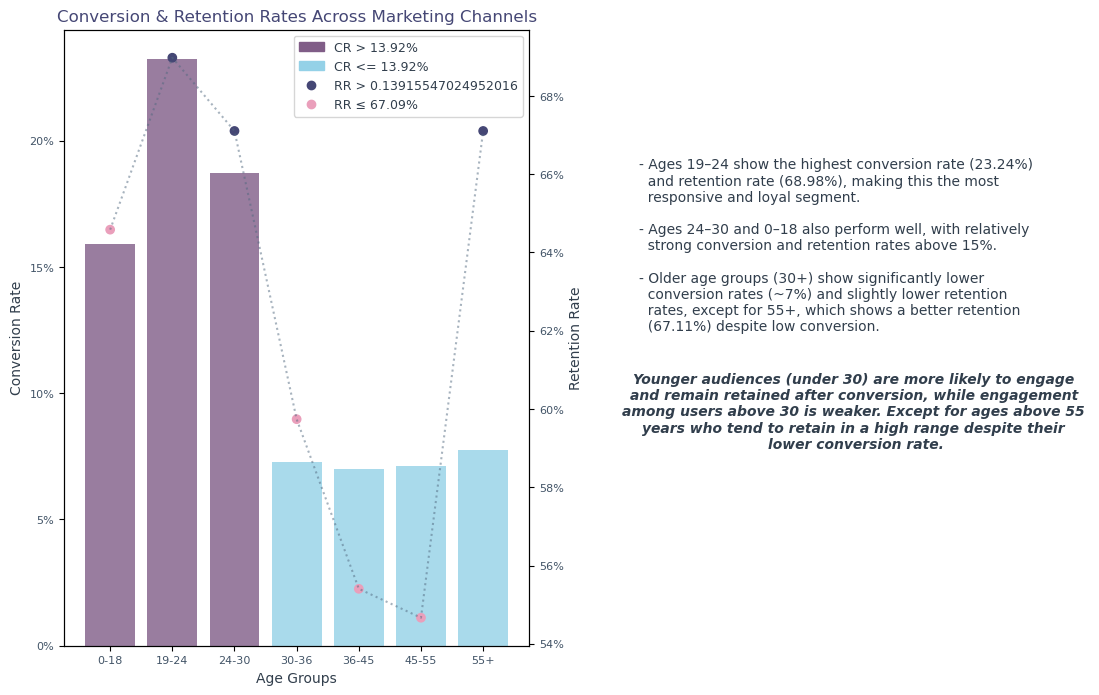

In [404]:
# Visualization - Comparing Conversion Rates with Retention Rates within Age Groups:
# Data
x=[a.replace(' years','') for a in performance_age.age_group.to_list()]
y=performance_age.conversion_rate
z=performance_age.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,8))

# 1- Conversion Rate (Bar)
ax1.bar(x,y, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Marketing Channels', fontsize=12, color='#454775')

ax1.set_xlabel('Age Groups', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below_cr = mpatches.Patch(color='#94D1E7', label='CR <= 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 67.09%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 67.09%')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C', loc='upper right')

# Findings
text1='''
- Ages 19–24 show the highest conversion rate (23.24%) 
  and retention rate (68.98%), making this the most 
  responsive and loyal segment.\n
- Ages 24–30 and 0–18 also perform well, with relatively 
  strong conversion and retention rates above 15%.\n
- Older age groups (30+) show significantly lower 
  conversion rates (~7%) and slightly lower retention 
  rates, except for 55+, which shows a better retention 
  (67.11%) despite low conversion.'''
text2='''
Younger audiences (under 30) are more likely to engage 
and remain retained after conversion, while engagement 
among users above 30 is weaker. Except for ages above 55 
years who tend to retain in a high range despite their 
lower conversion rate.'''
plt.text(8.5,.62,text1, color='#313E4C')
plt.text(12,.59,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

#### $\color{#454775}{6-}$ *Date Served:*

In [346]:
# Calculating Conversion Rate Within Served Dates
converted_date=converted_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'converted'})

users_date = marketing.groupby('date_served').user_id.nunique().reset_index()\
                    .rename(columns={'user_id':'total_users'})

conversion_date =users_date.merge(converted_date, on ='date_served')

conversion_date['date_served']=conversion_date['date_served'].dt.date 

conversion_date['conversion_rate']=conversion_date['converted']/conversion_date['total_users']

conversion_date.style.hide().format({'conversion_rate':'{:,.2%}'})

date_served,total_users,converted,conversion_rate
2018-01-01,362,36,9.94%
2018-01-02,374,37,9.89%
2018-01-03,348,36,10.34%
2018-01-04,323,35,10.84%
2018-01-05,319,40,12.54%
2018-01-06,308,35,11.36%
2018-01-07,275,39,14.18%
2018-01-08,312,36,11.54%
2018-01-09,312,39,12.50%
2018-01-10,337,40,11.87%


In [347]:
# Calculating Retention Rate Within Served Dates
retained_date=retained_users.groupby('date_served').user_id.nunique().reset_index()\
                             .rename(columns={'user_id':'retained'})

retention_date = converted_date.merge(retained_date, on='date_served')

retention_date['date_served']=retention_date['date_served'].dt.date 

retention_date['retention_rate']=retention_date['retained']/retention_date['converted']

retention_date.style.hide().format({'retention_rate':'{:,.2%}'})

date_served,converted,retained,retention_rate
2018-01-01,36,28,77.78%
2018-01-02,37,27,72.97%
2018-01-03,36,27,75.00%
2018-01-04,35,18,51.43%
2018-01-05,40,24,60.00%
2018-01-06,35,28,80.00%
2018-01-07,39,23,58.97%
2018-01-08,36,24,66.67%
2018-01-09,39,26,66.67%
2018-01-10,40,27,67.50%


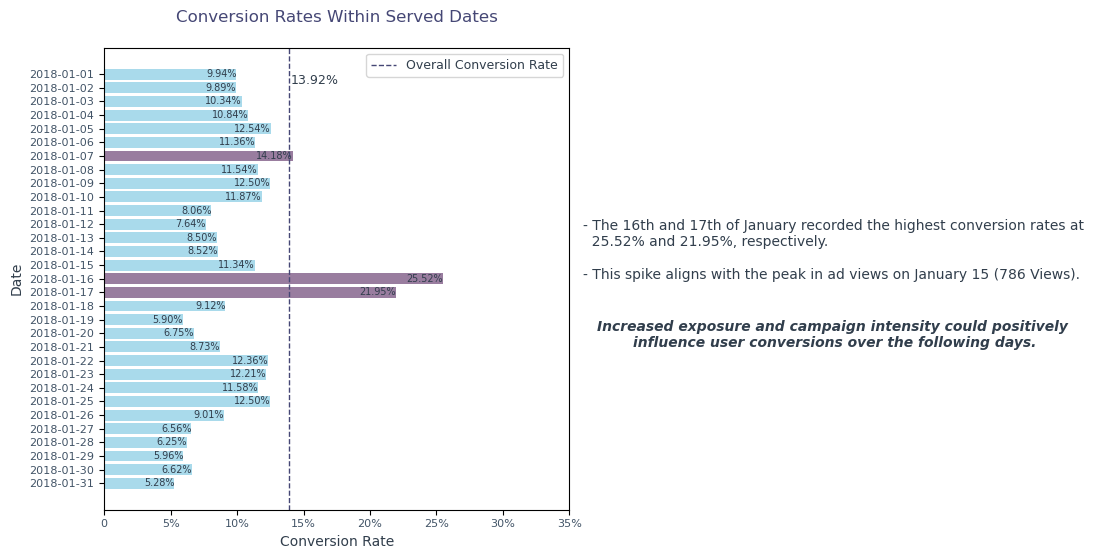

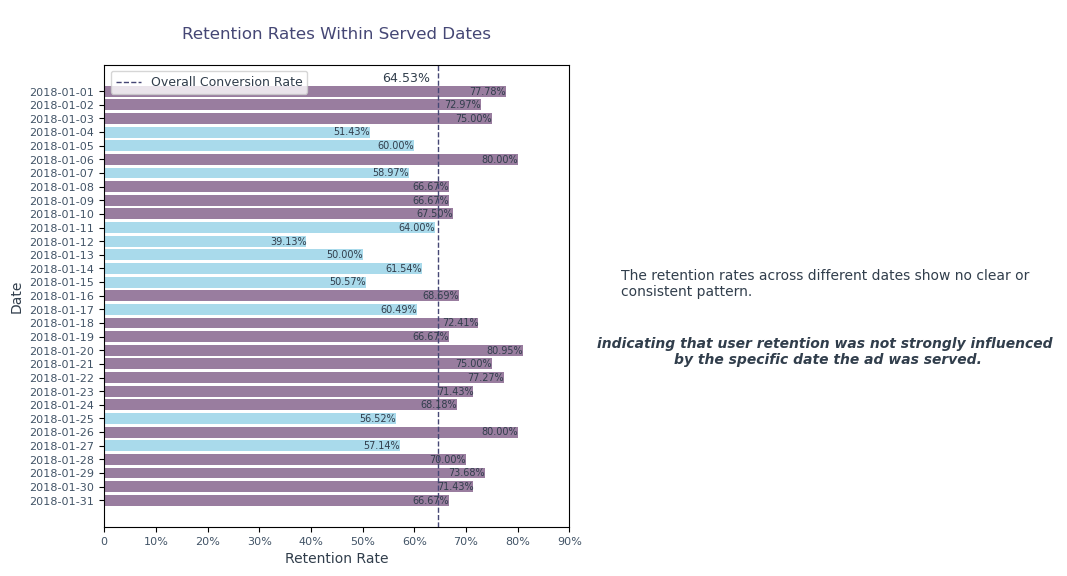

In [348]:
# 1- Visualization - Conversion Rates Within Served Dates 
# Data
x= conversion_date.date_served.astype('str').to_list()
y= conversion_date.conversion_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(x,y,.8, color=colors,alpha = .8)
plt.axvline(x=conversion_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()
plt.title('Conversion Rates Within Served Dates\n', fontsize=12, color='#454775')
plt.xlabel('Conversion Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,.40,.05),['0','5%','10%','15%','20%','25%','30%','35%'],fontsize=8, color='#415366')
plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks( fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(.14,0, '13.92%', ha= 'left', va ='top', fontsize=9, color='#313E4C')
for i,v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text1='''
- The 16th and 17th of January recorded the highest conversion rates at 
  25.52% and 21.95%, respectively.\n
- This spike aligns with the peak in ad views on January 15 (786 Views).'''
text2='''
Increased exposure and campaign intensity could positively 
influence user conversions over the following days.'''
plt.text(.36,15,text1, color='#313E4C')
plt.text(.55,20,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

# 2- Visualization - Retention Rates Within Served Dates: 
# Data
x= retention_date.date_served.astype('str').to_list()
y= retention_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.subplots(figsize = (6,6))
plt.barh(x,y,.8, color=colors,alpha = .8)
plt.axvline(x=retention_rate, color='#454775', linestyle='--', linewidth=1, label='Overall Conversion Rate', alpha=1)

# Customizing the chart
plt.gca().invert_yaxis()
plt.title('\nRetention Rates Within Served Dates\n', fontsize=12, color='#454775')
plt.xlabel('Retention Rate', fontsize=10, color='#313E4C')
plt.xticks(np.arange(0,1,.1),['0','10%','20%','30%','40%','50%','60%','70%','80%','90%'],fontsize=8, color='#415366')
plt.ylabel('Date', fontsize=10, color='#313E4C')
plt.yticks(fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C') 

# Annotating chart with values
plt.text(.63,-0.5, '64.53%', ha= 'right', va ='bottom', fontsize=9, color='#313E4C')
for i,v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')

# Findings 
text3='''
The retention rates across different dates show no clear or 
consistent pattern.'''
text4='''
indicating that user retention was not strongly influenced 
by the specific date the ad was served.'''
plt.text(1,15,text3, color='#313E4C')
plt.text(1.4,20,text4, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show()

In [349]:
# Comparing Conversion Rates with Retention Rates Across Service Dates
performance_date=conversion_date.merge(retention_date,on='date_served')\
                            .loc[:,['date_served','conversion_rate','retention_rate']]

performance_date.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

date_served,conversion_rate,retention_rate
2018-01-01,9.94%,77.78%
2018-01-02,9.89%,72.97%
2018-01-03,10.34%,75.00%
2018-01-04,10.84%,51.43%
2018-01-05,12.54%,60.00%
2018-01-06,11.36%,80.00%
2018-01-07,14.18%,58.97%
2018-01-08,11.54%,66.67%
2018-01-09,12.50%,66.67%
2018-01-10,11.87%,67.50%


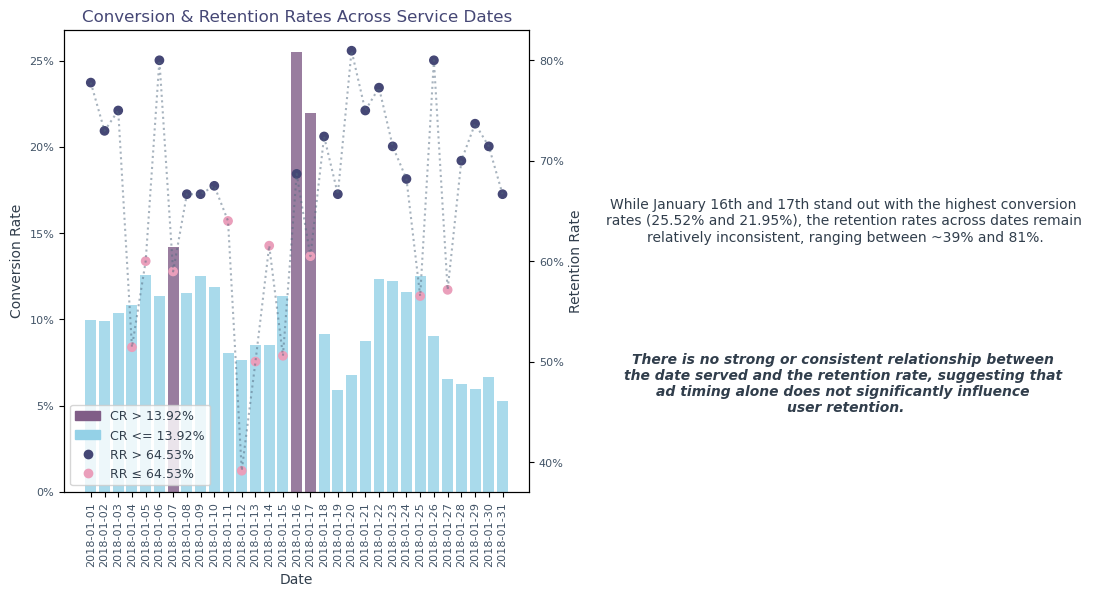

In [350]:
# Visualization - Conversion & Retention Rates Across Service Dates:
# Data
x=performance_date.date_served.astype('str').to_list()
y=performance_date.conversion_rate
z=performance_date.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(6,6))

# 1- Conversion Rate (Bar)
ax1.bar(x,y, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Service Dates', fontsize=12, color='#454775')

ax1.set_xlabel('Date', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8,labelrotation=90) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1,decimals=False)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below_cr = mpatches.Patch(color='#94D1E7', label='CR <= 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 64.53%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 64.53%')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='lower left')

# Findings
text1='''
While January 16th and 17th stand out with the highest conversion 
rates (25.52% and 21.95%), the retention rates across dates remain 
relatively inconsistent, ranging between ~39% and 81%.'''

text2='''
There is no strong or consistent relationship between 
the date served and the retention rate, suggesting that 
ad timing alone does not significantly influence 
user retention.'''

plt.text(55,.62,text1, color='#313E4C', ha='center')
plt.text(55,.45,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

<br>

### $\color{#454775}{Q2:}$ ***Is there evidence that multi-touch exposure (users seeing multiple ads) improves conversion or retention rates?***


In [351]:
# Calculating Conversion Rate across single & multi-touch exposure
converted_exposure=converted_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                             .rename(columns={'ad_repeated':'ad_exposure','user_id':'converted'})

users_exposure = marketing.groupby('ad_repeated').user_id.nunique().reset_index()\
                    .rename(columns={'ad_repeated':'ad_exposure','user_id':'total_users'})

conversion_exposure =users_exposure.merge(converted_exposure, on ='ad_exposure')

conversion_exposure['conversion_rate']=conversion_exposure['converted']/conversion_exposure['total_users']

conversion_exposure['ad_exposure']= np.where(conversion_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

conversion_exposure.style.hide().format({'conversion_rate':'{:,.2%}'})


ad_exposure,total_users,converted,conversion_rate
single_exposure,5038,439,8.71%
multi_exposure,2256,576,25.53%


In [352]:
# Calculating Retention Rate across single & multi-touch exposure
retained_exposure=retained_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                             .rename(columns={'ad_repeated':'ad_exposure','user_id':'retained'})

retention_exposure= converted_exposure.merge(retained_exposure, on='ad_exposure')

retention_exposure['retention_rate']=retention_exposure['retained']/retention_exposure['converted']

retention_exposure['ad_exposure']= np.where(retention_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

retention_exposure.style.hide().format({'retention_rate':'{:,.2%}'})

ad_exposure,converted,retained,retention_rate
single_exposure,439,279,63.55%
multi_exposure,576,376,65.28%


In [353]:
# merging conversion & retention dates across single & multi-touch exposure
performance_exposure=conversion_exposure.merge(retention_exposure,on='ad_exposure')\
                                        .loc[:,['ad_exposure','conversion_rate','retention_rate']]\
                                        .sort_values('conversion_rate', ascending=False)

performance_exposure.style.hide().format({'conversion_rate':'{:,.2%}','retention_rate':'{:,.2%}'})

ad_exposure,conversion_rate,retention_rate
multi_exposure,25.53%,65.28%
single_exposure,8.71%,63.55%


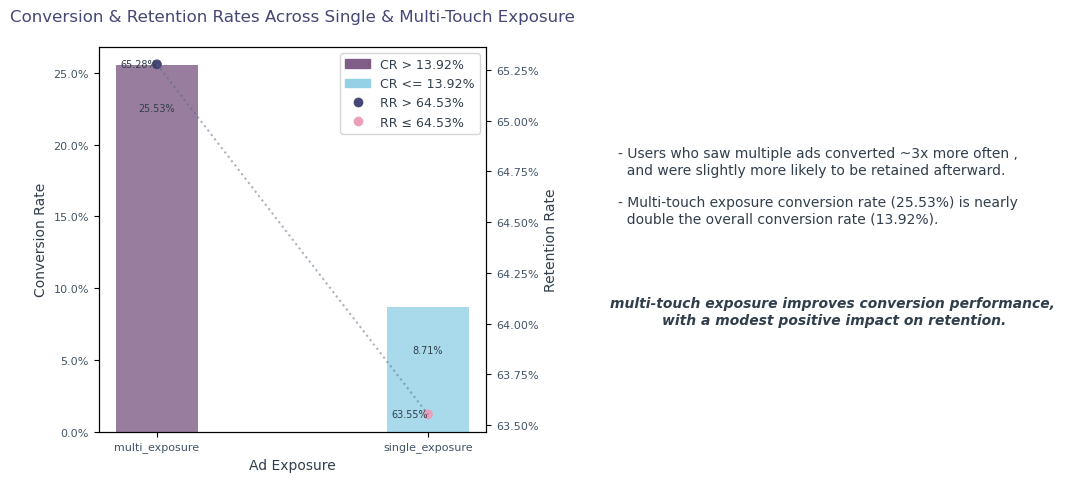

In [354]:
# Visualization - Conversion & Retention Rates Across Single & Multi-Touch Exposure:
# Data
x=performance_exposure.ad_exposure.to_list()
y=performance_exposure.conversion_rate
z=performance_exposure.retention_rate

# Defining colors based on performance
colors = ['#805D87' if n > conversion_rate else '#94D1E7' for n in y] 
colors2= ['#454775' if m > retention_rate else '#EA9FBB' for m in z]

# Creating the chart 
fig,ax1=plt.subplots(figsize=(5,5))

# 1- Conversion Rate (Bar)
ax1.bar(x,y,.3, alpha=.8, color=colors, label='Conversion Rate')

# 2- Retention Rate
ax2 = ax1.twinx()
ax2.plot(x,z, ls='dotted', color='#51687F', label='Retention Rate', alpha=.5)
ax2.scatter(x,z,color=colors2,label=['CR > 64.53%','CR <= 64.53%'])

# Customizing the chart
plt.title('Conversion & Retention Rates Across Single & Multi-Touch Exposure\n', fontsize=12, color='#454775')

ax1.set_xlabel('Ad Exposure', fontsize=10,color='#313E4C')
ax1.tick_params(axis='x',labelcolor='#415366',labelsize=8) 

ax1.set_ylabel('Conversion Rate', fontsize=10,color='#313E4C')
ax1.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

ax2.set_ylabel('Retention Rate', fontsize=10, color='#313E4C')
ax2.tick_params(axis='y',labelcolor='#415366',labelsize=8)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(1)) 

# Legend
above_cr = mpatches.Patch(color='#805D87', label='CR > 13.92%')
below_cr = mpatches.Patch(color='#94D1E7', label='CR <= 13.92%')
above_rr = mlines.Line2D([], [], color='#454775', marker='o',linestyle='None',label='RR > 64.53%')
below_rr = mlines.Line2D([], [], color='#EA9FBB', marker='o', linestyle='None',label='RR ≤ 64.53%')
plt.legend(handles=[above_cr,below_cr,above_rr,below_rr],fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating chart with values
for r,s in enumerate(y):
    ax1.text(r,s-.03,f'{s:.2%}',va='center',ha='center', fontsize=7, color='#313E4C')

for i,v in enumerate(z):
    ax2.text(i,v,f'{v:.2%}',va='center',ha='right', fontsize=7, color='#313E4C')
    
# Findings
text1='''
- Users who saw multiple ads converted ~3x more often ,
  and were slightly more likely to be retained afterward.\n
- Multi-touch exposure conversion rate (25.53%) is nearly 
  double the overall conversion rate (13.92%).'''

text2='''
multi-touch exposure improves conversion performance, 
with a modest positive impact on retention.'''

plt.text(1.7,.645,text1, color='#313E4C', ha='left')
plt.text(2.5,.64,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')
plt.show();

>$\color{#454775}{Note}:$<br>
>_Around 70% of unique users (~5,000) were exposed to the ad only once. This large proportion could be aligned with the extensive ad distribution through House Ads, which had the lowest conversion (7.51%) and retention (58.05%) rates._

In [355]:
# Single & Multi-Exposures Across Marketing Channels:
users_exposure_house = marketing.groupby(['ad_repeated','is_house_ad']).user_id.nunique().reset_index()\
                                .rename(columns={'ad_repeated':'ad_exposure','is_house_ad':'ad_type','user_id':'total_users'})

users_exposure_house['ad_exposure']=np.where(users_exposure_house['ad_exposure']==True,'multi_exposure','single_exposure')

users_exposure_house['ad_type']=np.where(users_exposure_house['ad_type']==True,'house_ad','others')

users_exposure_house =users_exposure_house.pivot_table(values='total_users', index='ad_type', columns='ad_exposure')\
                                          .apply(lambda x: x/sum(x)).reset_index()

users_exposure_house.style.hide().format({'multi_exposure':'{:,.2%}','single_exposure':'{:,.2%}'})

ad_type,multi_exposure,single_exposure
house_ad,49.45%,44.18%
others,50.55%,55.82%


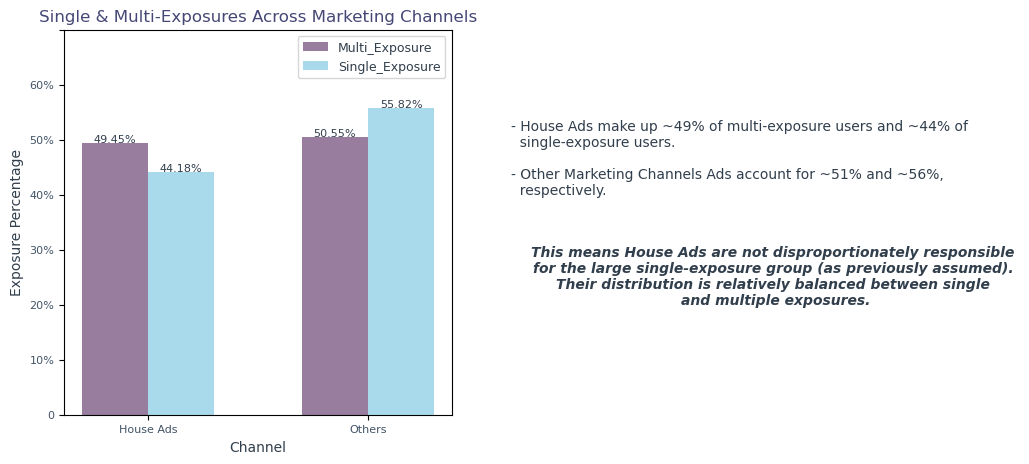

In [356]:
# Visualization - Single & Multi-Exposures Across Marketing Channels:
#Data:
x=np.arange(len(users_exposure_house.ad_type))
y=users_exposure_house.multi_exposure
z=users_exposure_house.single_exposure

# Creating the Chart:
plt.subplots(figsize=(5,5))
width=.3
location=x+width/2

# 1- Multi-Exposure:
plt.bar(x,y,width, label='Multi_Exposure',color='#805D87', alpha=.8)

# 2- Single-Exposure:
plt.bar(x+width,z,width,label='Single_Exposure',color='#94D1E7',alpha=.8)

# Customizing the Chart:
plt.title('Single & Multi-Exposures Across Marketing Channels', fontsize=12, color='#454775')
plt.xlabel('Channel', fontsize=10, color='#313E4c')
plt.xticks(location, ['House Ads', 'Others'], fontsize=8, color='#415366')
plt.ylabel('Exposure Percentage', fontsize=10, color='#313E4c')
plt.yticks(np.arange(0,.8,.1), ['0','10%','20%','30%','40%','50%','60%',''], fontsize=8, color='#415366')
plt.legend(fontsize=9,labelcolor='#313E4C',loc='upper right')

# Annotating Values to the Chart:
for i,v in enumerate(y):
    plt.text(i,v,f'{v:,.2%}', ha='center', fontsize=8, color='#313E4c')
for r,s in enumerate(z):
    plt.text(r+width,s,f'{s:,.2%}', ha='center', fontsize=8, color='#313E4c')

# Findings:
text1= '''
- House Ads make up ~49% of multi-exposure users and ~44% of 
  single-exposure users.\n
- Other Marketing Channels Ads account for ~51% and ~56%, 
  respectively.'''
text2=''' 
This means House Ads are not disproportionately responsible 
for the large single-exposure group (as previously assumed). 
Their distribution is relatively balanced between single 
and multiple exposures.'''
plt.text(1.8,.4,text1, color='#313E4C', ha='left')
plt.text(3,.2,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10, color='#313E4C')

plt.show();

<br>

### $\color{#454775}{\sf Audience\;and\;Channel\;Interaction:}$
### $\color{#454775}{Q3:}$ ***Which combinations of age group and marketing channel yield the highest conversion and retention rates?***


In [357]:
converted_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 1711
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1074 non-null   object        
 1   date_served          1074 non-null   datetime64[ns]
 2   marketing_channel    1074 non-null   object        
 3   variant              1074 non-null   object        
 4   converted            1074 non-null   bool          
 5   language_displayed   1074 non-null   object        
 6   language_preferred   1074 non-null   object        
 7   age_group            1074 non-null   object        
 8   date_subscribed      1048 non-null   datetime64[ns]
 9   date_canceled        349 non-null    datetime64[ns]
 10  subscribing_channel  1048 non-null   object        
 11  is_retained          1048 non-null   object        
 12  is_house_ad          1074 non-null   bool          
 13  matched_lang         1074 non-nul

In [360]:
converted_users[converted_users.subscribing_channel.isna()==True]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,matched_lang,dow,ad_repeated,ch_code
3705,a100002164,2018-01-15,Email,control,True,English,English,30-36 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3711,a100002166,2018-01-15,Email,control,True,English,English,45-55 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3714,a100002167,2018-01-15,Email,control,True,English,English,0-18 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3717,a100002168,2018-01-15,Email,control,True,English,English,19-24 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3723,a100002170,2018-01-15,Email,control,True,English,English,30-36 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3726,a100002171,2018-01-15,Email,control,True,English,English,36-45 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3729,a100002172,2018-01-15,Email,control,True,English,English,45-55 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3699,a100002162,2018-01-15,Email,control,True,English,English,19-24 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3687,a100002158,2018-01-15,Email,control,True,English,English,30-36 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5
3690,a100002159,2018-01-15,Email,control,True,English,English,36-45 years,NaT,NaT,NaN,NaN,False,True,Mo,True,5


In [358]:
converted_c_a=converted_users.groupby('ad_repeated').user_id.nunique().reset_index()\
                             .rename(columns={'ad_repeated':'ad_exposure','user_id':'converted'})

users_exposure = marketing.groupby('ad_repeated').user_id.nunique().reset_index()\
                    .rename(columns={'ad_repeated':'ad_exposure','user_id':'total_users'})

conversion_exposure =users_exposure.merge(converted_exposure, on ='ad_exposure')

conversion_exposure['conversion_rate']=conversion_exposure['converted']/conversion_exposure['total_users']

conversion_exposure['ad_exposure']= np.where(conversion_exposure['ad_exposure']==True,'multi_exposure','single_exposure')

conversion_exposure.style.hide().format({'conversion_rate':'{:,.2%}'})

ad_exposure,total_users,converted,conversion_rate
single_exposure,5038,439,8.71%
multi_exposure,2256,576,25.53%
